<a href="https://colab.research.google.com/github/theuttammishra/Classification-Capstone/blob/main/Credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Uttam Mishra
##### **Team Member 2 -** Kshitij Singh


# **Project Summary -**


This project named Credit Card default prediction is aimed at predicting the probability of default for a probable customer. The data is a excel file having in total of 30001 columns and 25 rows. data had informations such as customer id, age, sex, marriage info, education level etc. with this data we have to predict the default or the probability of default for a customer.

working on this project we first started with loading the dataset and going through it to understand the variables.
In the dataset we found that the column headers seem to be incorrect so we replaced it with the next actual column, which in turn was the real variable column.
Now the dataset which contained information regarding the credit card bill, payment and customer related info was not analysis ready so in the next step we performed data wrangling in it. we also changed the values which were numerical in columns to their appropriate values so that it will be helpful to understand the data visualizations.

After the data wrangling we moved towards data visualization.
In the data visualization we used multiple graphs including Bar graph, Pie plot, Correlation heatmap, Pairplot etc. and with the help of these we found out some crucial results. we also tried top plot the relationship between discrete features and continuous features using distplot.
Next to implement our Models we needed the dataset to be more balanced and categorised.
Now we introduced some new features along with data preprocessing. Also at this stage we checked for outliers and missing values.
For outlier treatment we used IQR method.
After that we moved to feature manipulation and Categorical Encoding.
After using Onehotencoding we did data split of 30%-70% test to train and then scaled our dataset.
At this stage we checked whether our dataset is balanced or imbalanced and found it to be largely imbalanced.
For balancing the dataset we used ***SMOTE*** which balanced the dataset.
Now our data was ready for implementing Machine Learning models.

We started with Random Forest Classifier and after predicting with the model we used the Function which we created to check the evaluation metrics.
After the model we used RandomSearchCV for hyperparameter tuning and then checked important feature. And also used confusion matrix for evaluation purpose.
Our second model was ***LightBGM*** we performed the similar steps as in the case of RandomForest and found its evaluation metrics and for hyperparameter tuning here we used gridsearchcv and plotted the feature importance.
We again performed the same steps with ***XGBoost*** as our third model.
After predicting with three different models and comparing their scores we found that ***RandomForestClassifier*** is the best model.

# **GitHub Link -**

https://github.com/theuttammishra/Classification-Capstone

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.We can use the K-S chart to evaluate which customers will default on their credit card payments

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from collections import OrderedDict

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

### Dataset Loading

In [2]:
# Load Dataset
# Mounting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
df = pd.read_excel("/content/drive/MyDrive/Classification Capstone/default of credit card clients.xls")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
Rows,Columns = df.shape
print('Number of rows =',Rows)
print('Number of columns =',Columns)

Number of rows = 30001
Number of columns = 25


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [9]:
# Checking for null values
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

### What did you know about your dataset?

1. There are 30001 Rows and 25 columns present in the dataset.
2. Given dataset does not have any duplicated values.
3. Dataset does not have null or missing values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe().T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


Column names are looking incorrect, so replacing them with the next useful column which contains correct column names.

In [12]:
# dropping the index and renaming the header
df.rename(columns=df.iloc[0]).drop(df.index[0],inplace=True)
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [13]:
# making next row as columns
df.columns = df.iloc[0]
# dropping the index
df = df.drop(df.index[0])
# Resetting the index
df = df.reset_index(drop=True)

In [14]:
# Printing the coulumns again
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

From the above result we can see that column names are now correct.

In [15]:
# Printing the description of dataset again
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


### Variables Description 

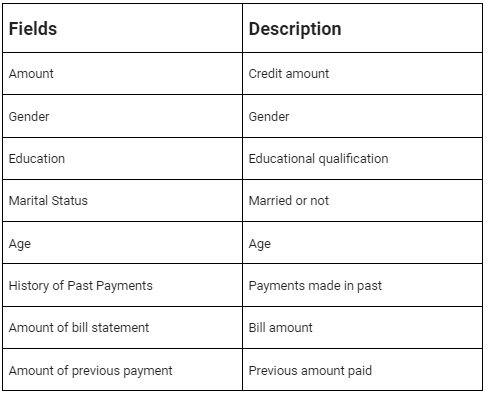

In the above picture the bottom three columns are divided in monthly columns in the dataset.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
uniquer = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']].nunique()
print(uniquer)

0
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64


In [17]:
# Printing the unique values for each column 
column_list = df.columns.values.tolist()
for column_name in column_list:
   print(f"Unique values in column '{column_name}':")
   print(df[column_name].unique())

Unique values in column 'ID':
[1 2 3 ... 29998 29999 30000]
Unique values in column 'LIMIT_BAL':
[20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
Unique values in column 'SEX':
[2 1]
Unique values in column 'EDUCATION':
[2 1 3 5 4 6 0]
Unique values in column 'MARRIAGE':
[1 2 3 0]
Unique values in column 'AGE':
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 7

## 3. ***Data Wrangling***

### Data Wrangling Code

Changing the column names as they are not clear to understand by adding months istead of numbers.

In [18]:
# Write your code to make your dataset analysis ready.
# renaming the pay column
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

# renaming the Bill column
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'},inplace=True)

# renaming the Amount column
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

# renaming the Default column
df.rename(columns={'default payment next month':'default'},inplace=True)

In [19]:
# Rechecking the names
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Correcting columns with unknown values and replacing them accordingly.

In [20]:
#Replacing the value that is unknown to others category
df["EDUCATION"].replace({0:4,5:4,6:4},inplace=True)
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [21]:
#Replacing the value that is unknown to others category
df["MARRIAGE"].replace({0:3},inplace=True)
df['MARRIAGE'].unique()

array([1, 2, 3])

Changing ting the datatypes to integer only

In [22]:
#converting all columns to int data type
df = df.apply(pd.to_numeric, errors='coerce')

In [23]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_SEPT       30000 non-null  int64
 7   PAY_AUG        30000 non-null  int64
 8   PAY_JUL        30000 non-null  int64
 9   PAY_JUN        30000 non-null  int64
 10  PAY_MAY        30000 non-null  int64
 11  PAY_APR        30000 non-null  int64
 12  BILL_AMT_SEPT  30000 non-null  int64
 13  BILL_AMT_AUG   30000 non-null  int64
 14  BILL_AMT_JUL   30000 non-null  int64
 15  BILL_AMT_JUN   30000 non-null  int64
 16  BILL_AMT_MAY   30000 non-null  int64
 17  BILL_AMT_APR   30000 non-null  int64
 18  PAY_AMT_SEPT   30000 non-null  int64
 19  PAY_

In the dataset some columns have numeric values so we are changing them to relevant values for data visualization purpose.

In [24]:
# changing the numerical values to relevant values
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4: 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'},
            'default' : {1:'defaulter',0:'nondefaulter'}}, inplace = True)

### What all manipulations have you done and insights you found?

1. Renamed the column names to understandable names.
2. Replaced unknown education categories to others.
3. Replaced unknown marriage categories to others.
4. Changes the datatypes to integer only.
5. Added relevant names to numeric values for data visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Checking the gender distribution

In [25]:
# Getting the total of different values present in the SEX column
df['SEX'].value_counts()

FEMALE    18112
MALE      11888
Name: SEX, dtype: int64

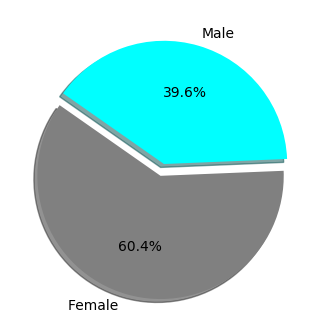

In [26]:
# Chart - 1 visualization code using pie chart
plt.figure(figsize = (6,4))
plt.pie(x= df['SEX'].value_counts(),explode=(0.1,0.0), colors = ['grey', 'cyan'], autopct='%1.1f%%', shadow=True,startangle = 145,labels = ['Female ','Male'])
plt.show()

##### 1. Why did you pick the specific chart?

It shows the clearly the percentage of gender distribution.

##### 2. What is/are the insight(s) found from the chart?

Gender Female is 60.4% and the rest are male.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help the company understand which gender is using their product more than the other gender.

#### Chart - 2 Plotting the education categories

In [27]:
# Getting the value count for the EDUCATION column
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

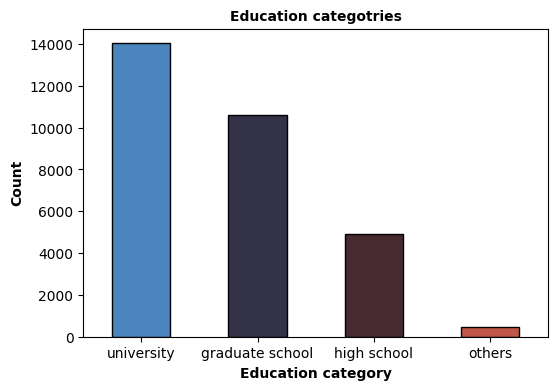

In [28]:
# plotting using count plot
plt.figure(figsize=(6,4))
ax=sns.countplot(x='EDUCATION',data = df,width = 0.5,palette = 'icefire',edgecolor = 'black')
ax.set_xlabel('Education category',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Education categotries",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

Following is the order of education University **>** Graduate School **>** High School **>** others

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will help the company understand the customers education level.

#### Chart - 3 Plotting the default column

In [29]:
# Printing the count of values in the default column
df['default'].value_counts()

nondefaulter    23364
defaulter        6636
Name: default, dtype: int64

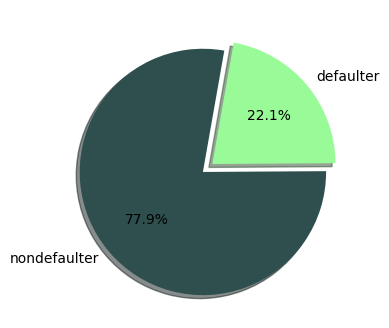

In [30]:
# Plotting the values using pie plot
plt.figure(figsize = (6,4))
plt.pie(x= df['default'].value_counts(),explode=(0.1,0.0), colors = ['darkslategray', 'palegreen'], autopct='%1.1f%%', shadow=True,startangle = 80
        ,labels = ['nondefaulter','defaulter'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is best to use when differentiating between two values.

##### 2. What is/are the insight(s) found from the chart?

There are 22.1% of the customer who have the risk of default.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the number of people who are default prone is high, the company may move towards loss.

#### Chart - 4 Checking the marital status of customer

In [31]:
# Printing the values in the marriage column
df['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

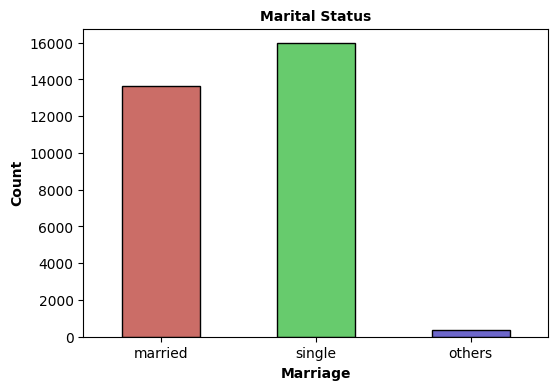

In [32]:
# Plotting using count plot
plt.figure(figsize=(6,4))
ax=sns.countplot(x=df['MARRIAGE'],palette = 'hls',width = 0.5,edgecolor = 'black')
ax.set_xlabel('Marriage',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Marital Status",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of customers are single.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can help company understand which category is less prone to default.

#### Chart - 5 Plotting the age distribution

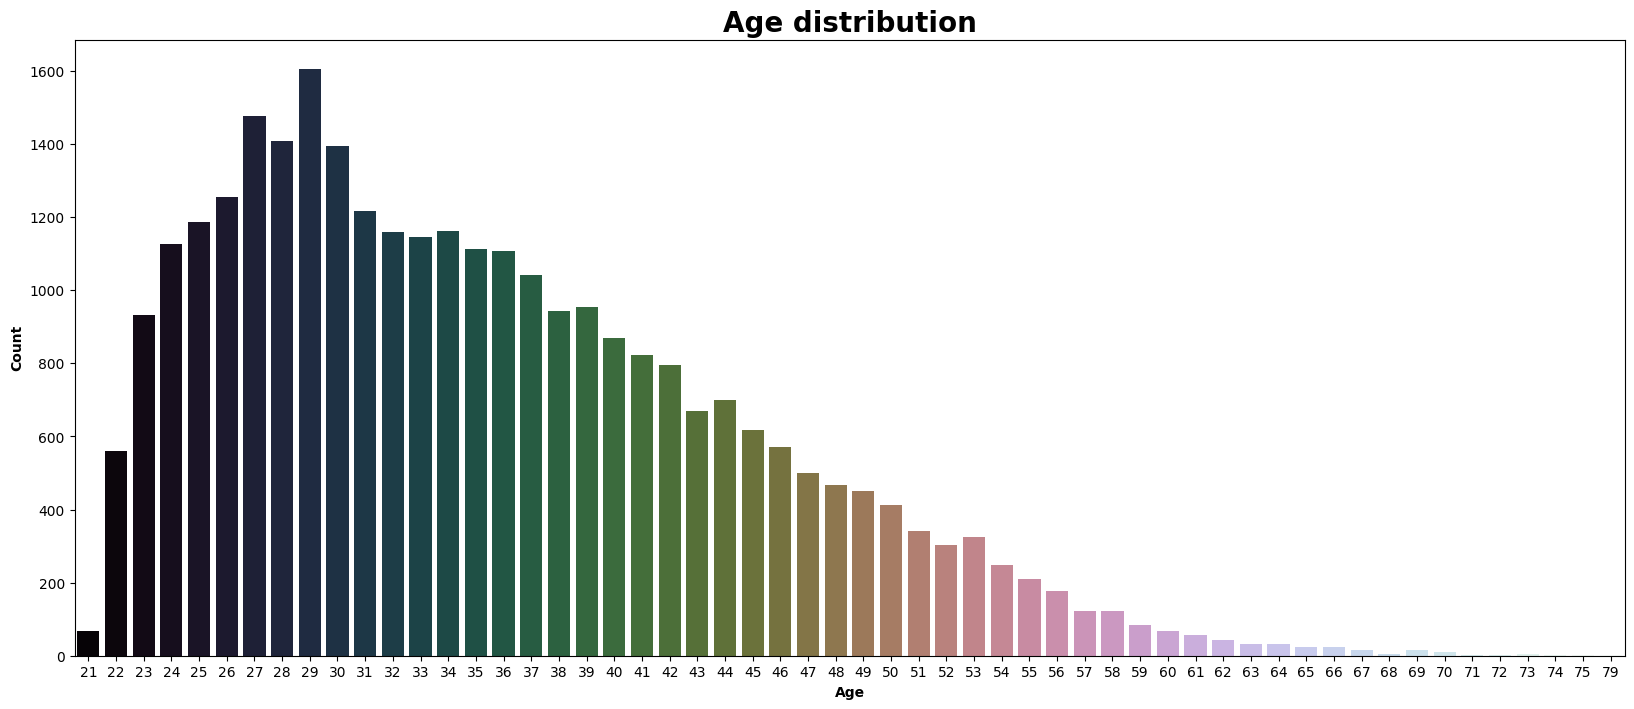

In [33]:
# Chart - 5 visualization code
plt.figure(figsize=(20,8))
ax = sns.countplot(x = 'AGE', data = df,palette = "cubehelix")
ax.set_xlabel('Age',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Age distribution",fontsize=20,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot gives correct count of all the unique variables in one graph.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers are of age group 25 years to 35 years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help company to know which age group is more prone to default.

#### Chart - 6 Age and default comparison

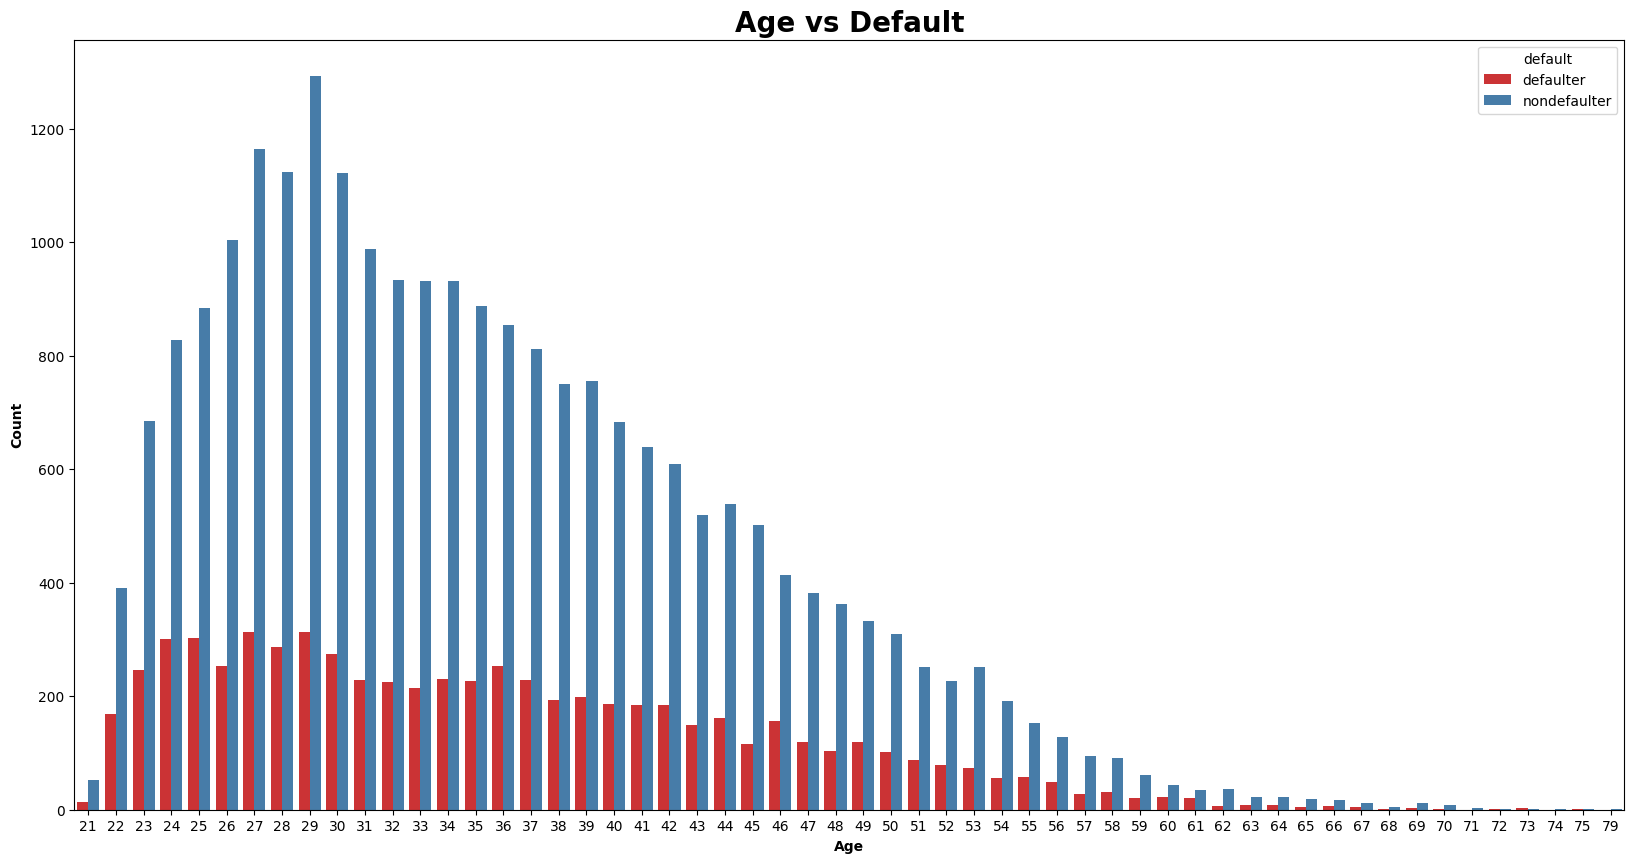

In [34]:
# Chart - 6 visualization code
#Age VS defaults
plt.figure(figsize=(20,10))
ax=sns.countplot(x='AGE',hue='default',data=df,palette="Set1")
ax.set_xlabel('Age',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Age vs Default",fontsize=20,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

Red color in the graph shows the defaulters in which Ages from 24 to 30 are having majority of the defaulters. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the to segregate the age group for defaulters.

#### Chart - 7 Gender and default comparison 

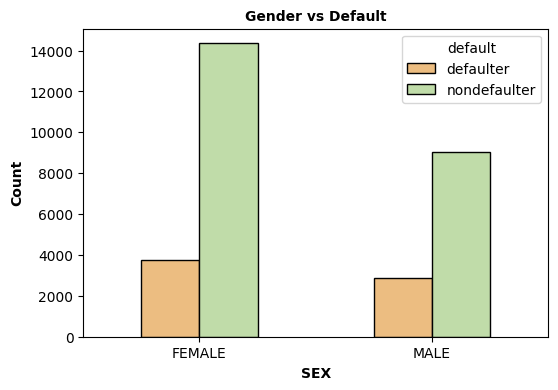

In [35]:
# Plotting using countplot
plt.figure(figsize=(6,4))
ax=sns.countplot(x='SEX',hue='default',data=df,palette="Spectral",width = 0.5, edgecolor = 'black')
ax.set_xlabel('SEX',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Gender vs Default",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is one of the best plots to use for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Females have more defaulters than males.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the company know which gender has more default probability.

#### Chart - 8 Marital status and default comparison

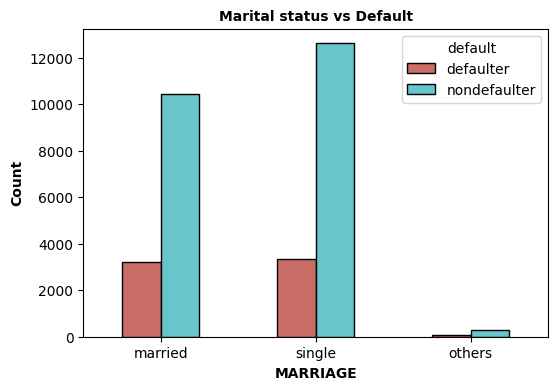

In [36]:
# Chart - 8 visualization code
plt.figure(figsize=(6,4))
ax=sns.countplot(x='MARRIAGE',hue='default',data=df,palette="hls",width = 0.5, edgecolor = 'black')
ax.set_xlabel('MARRIAGE',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Marital status vs Default",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is one of the best plots to use for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Singles have more defaulters than married customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help company make informed decisions about whether married or single people are more prone to default.

#### Chart - 9 Education vs default

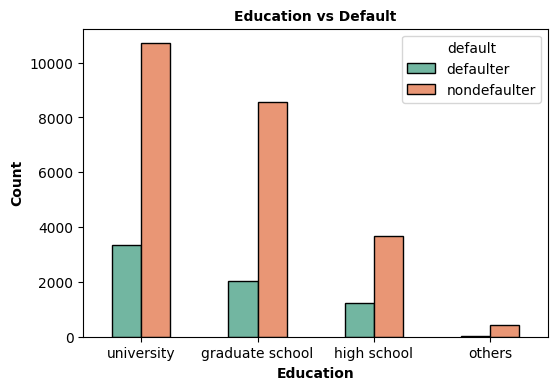

In [37]:
# Chart - 9 visualization code
plt.figure(figsize=(6,4))
ax=sns.countplot(x='EDUCATION',hue='default',data=df,palette="Set2",width = 0.5, edgecolor = 'black')
ax.set_xlabel('Education',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Education vs Default",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is one of the best plots to use for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

University graduates are more defaulters than graduate school and high school.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help company to know what is the education level of most of the defaulters.

#### Chart - 10 Plotting all the discrete features

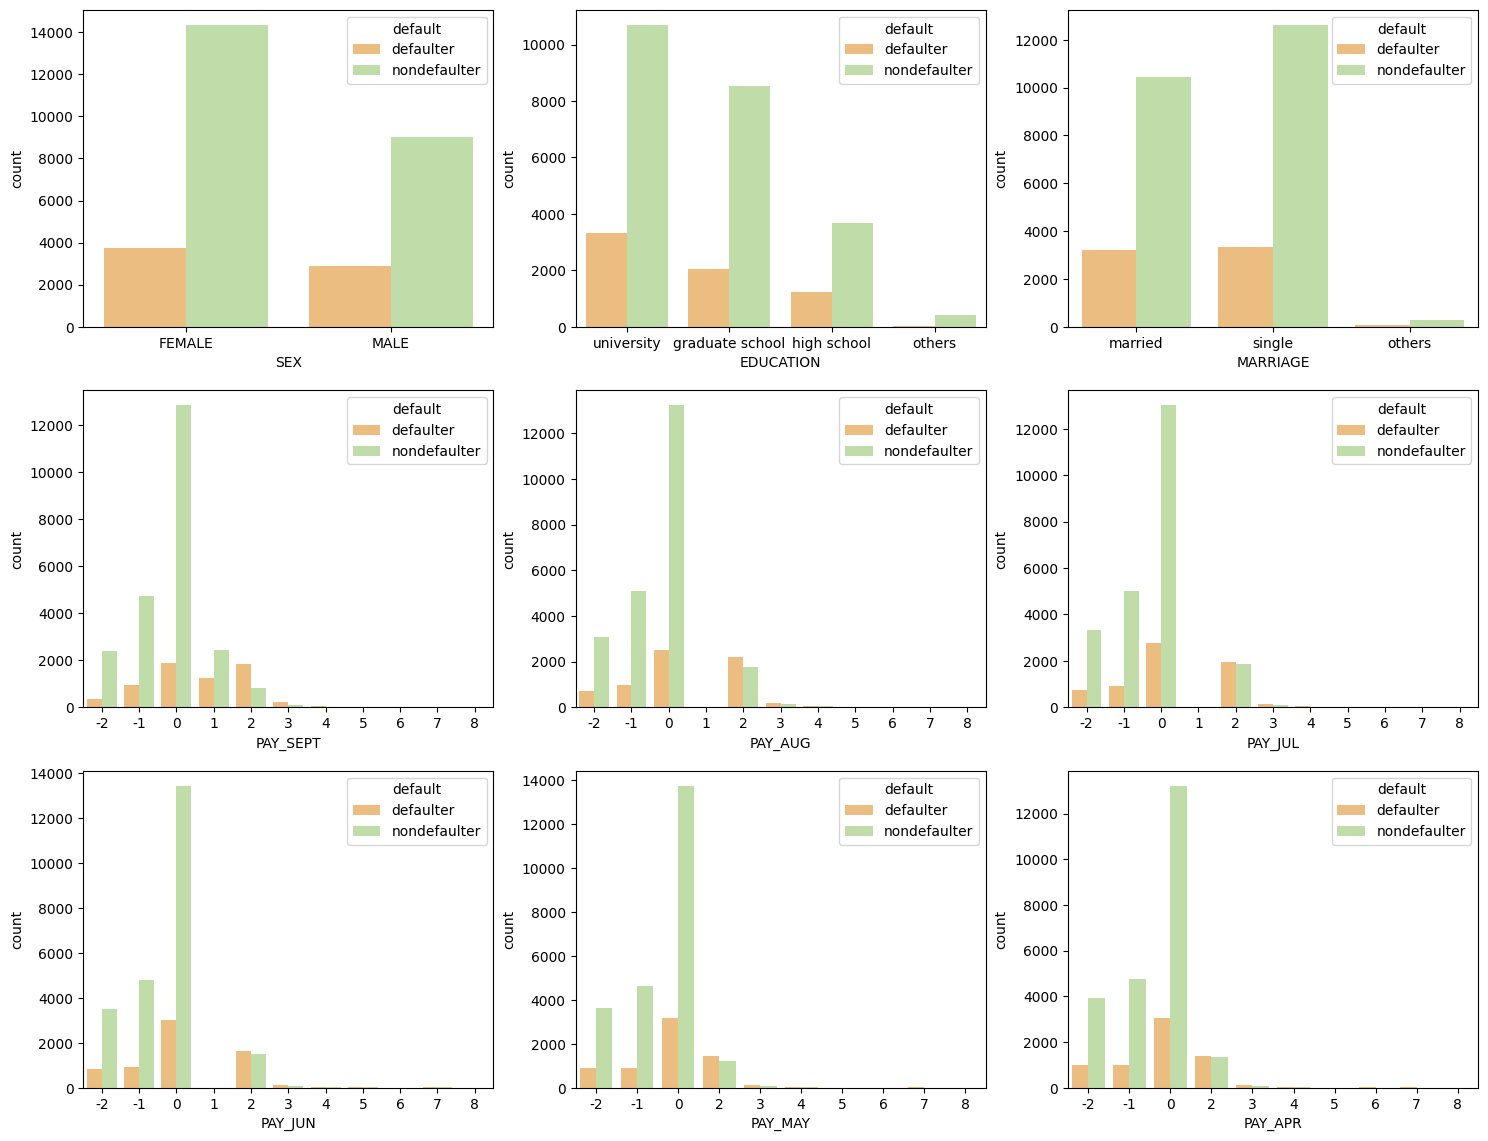

In [38]:
# Chart - 10 visualization code
# List of dicrete features
categorical_columns = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

# plotting
fig = plt.figure(figsize=(18,14))
for plot in range(len(categorical_columns)):
  col=categorical_columns[plot]
  sub=fig.add_subplot(3,3,plot+1)
  chart = sns.countplot(data=df,x=col,hue='default',palette='Spectral')

##### 1. Why did you pick the specific chart?

It shows various charts as part of one chart.

##### 2. What is/are the insight(s) found from the chart?

This chart shows insights related to all the discrete features of the dataset. and it also shows the monthly default values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights will help the company make informed decisions.

#### Chart - 11 Plotting the continuous features

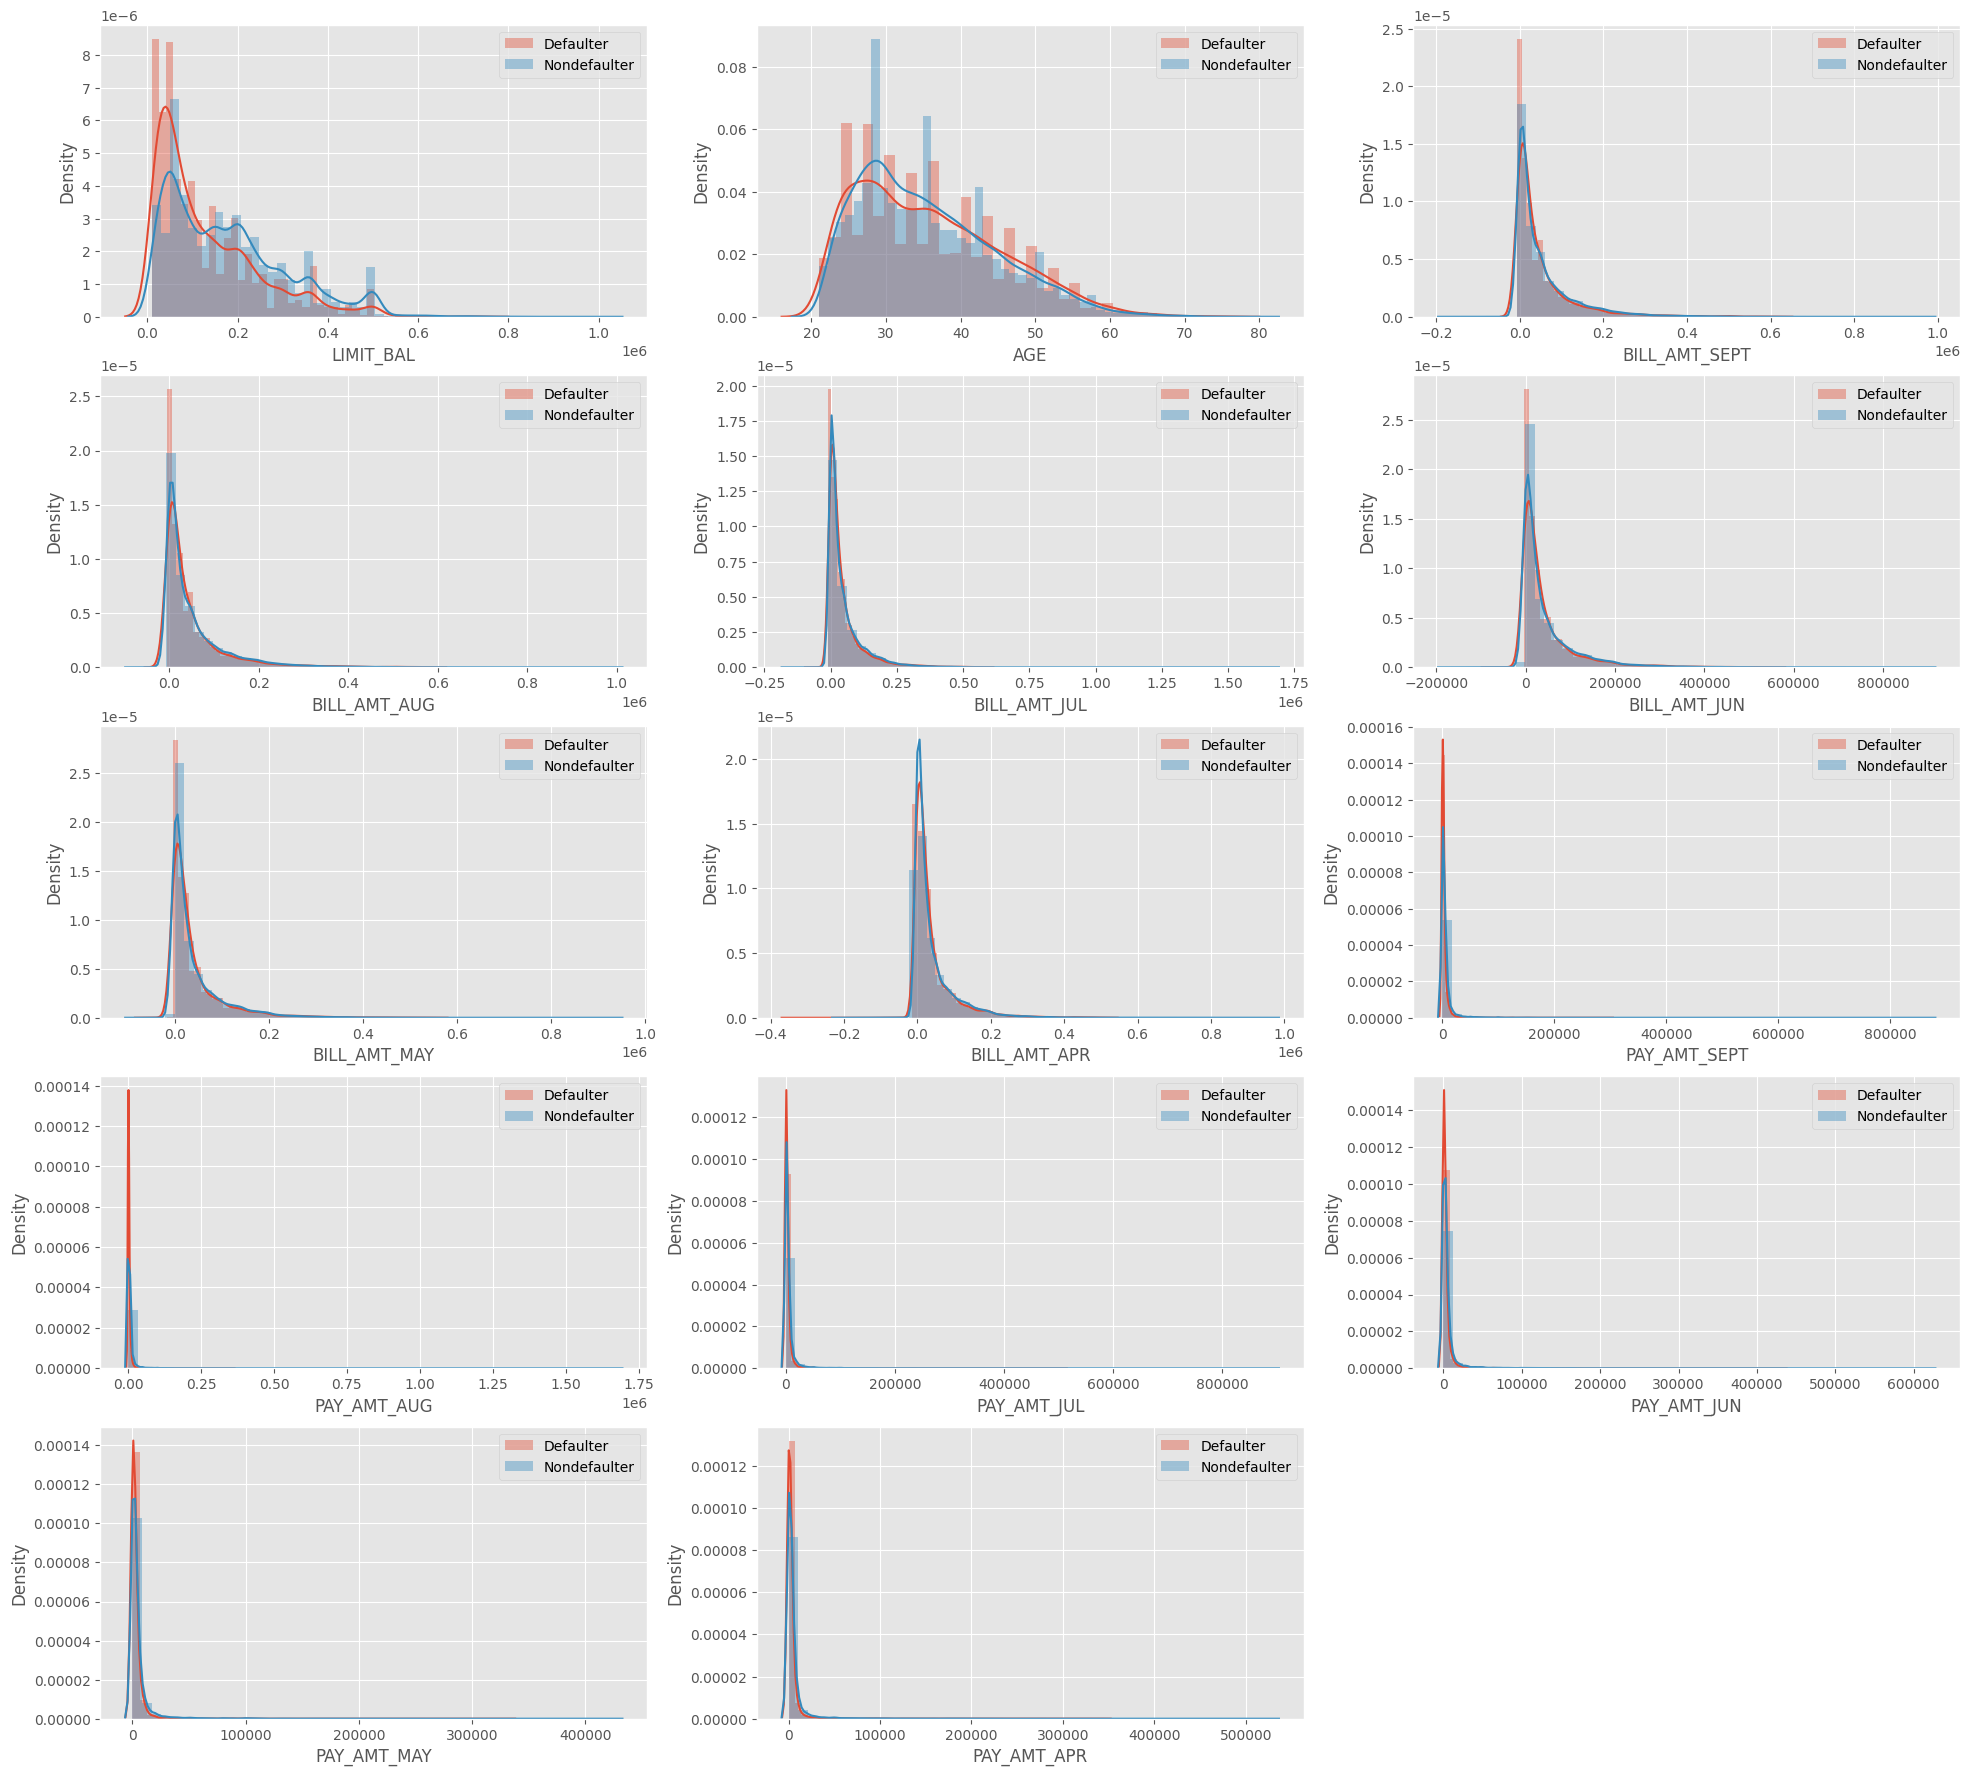

In [39]:
# Chart - 11 visualization code
#List of continuous features
con_column = ['LIMIT_BAL','AGE','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# Visualizing Graph for distribution of continuous features
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,22))
for i in range(len(con_column)):
  col=con_column[i]
  sub=fig.add_subplot(5,3,i+1)
  ax = sns.distplot(df[df.columns].loc[df['default'] == 'defaulter', col],label='Defaulter')
  ax = sns.distplot(df[df.columns].loc[df['default'] == 'nondefaulter', col],label='Nondefaulter')
  plt.legend()

##### 1. Why did you pick the specific chart?

Distribution plot is used to plot various features of the dataset.

##### 2. What is/are the insight(s) found from the chart?

Accounts with lower limit have higher rate of default as compared to higher credit limit accounts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help regulate the credit limit.

#### Chart - 12 Columns with continuous features using boxplot

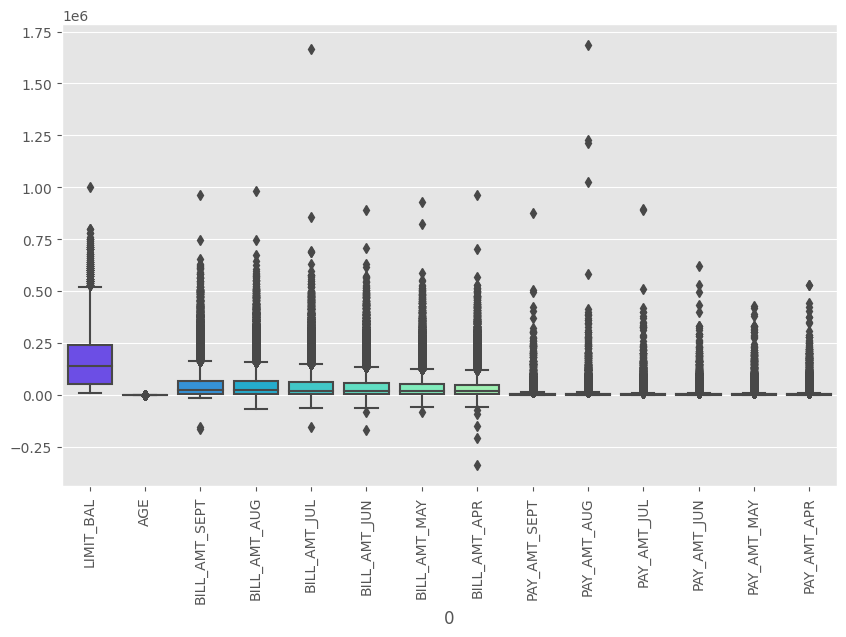

In [40]:
# Plotting using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data = df[con_column],palette = "rainbow")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot,

##### 2. What is/are the insight(s) found from the chart?

We can see that bill payment amount is lesser than the bill amount.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that many people are not paying the full bill amount.

#### Chart - 13 Credit limit balance using bins

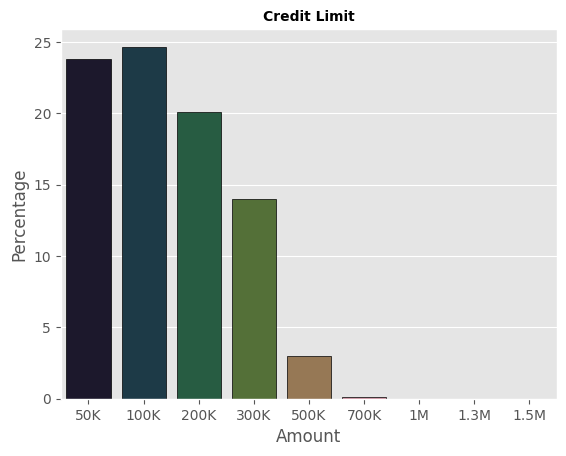

In [41]:
# Chart - 13 visualization code
# Creating a new column and defining bins to make group
cr_limit=(df['LIMIT_BAL'])
bins = [50000, 100000, 200000, 300000, 500000, 700000, 1000000,1300000,1500000,1700000]
group_names = ['50K', '100K', '200K', '300K', '500K', '700K','1M','1.3M','1.5M']
# making a dataframe
limit_df = pd.DataFrame({'cr_limit': cr_limit})
limit_df['cr_limit_group'] = pd.cut(limit_df['cr_limit'], bins, labels=group_names, right=False)
limit_group_counts = limit_df['cr_limit_group'].value_counts()
# Plotting using count plot
total_count = len(cr_limit)
percentage = (limit_group_counts / total_count) * 100
sns.barplot(x=limit_group_counts.index, y=percentage,palette = 'cubehelix',edgecolor = 'black')
plt.ylabel('Percentage')
plt.title('Credit Limit',fontsize=10,fontdict={"weight": "bold"})
plt.xlabel('Amount')
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph shows the difference of values of unique variables

##### 2. What is/are the insight(s) found from the chart?

Maximum number of people have a credit limit of 100k.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in understading the need of credit limit of customers.

#### Chart - 14 - Correlation Heatmap

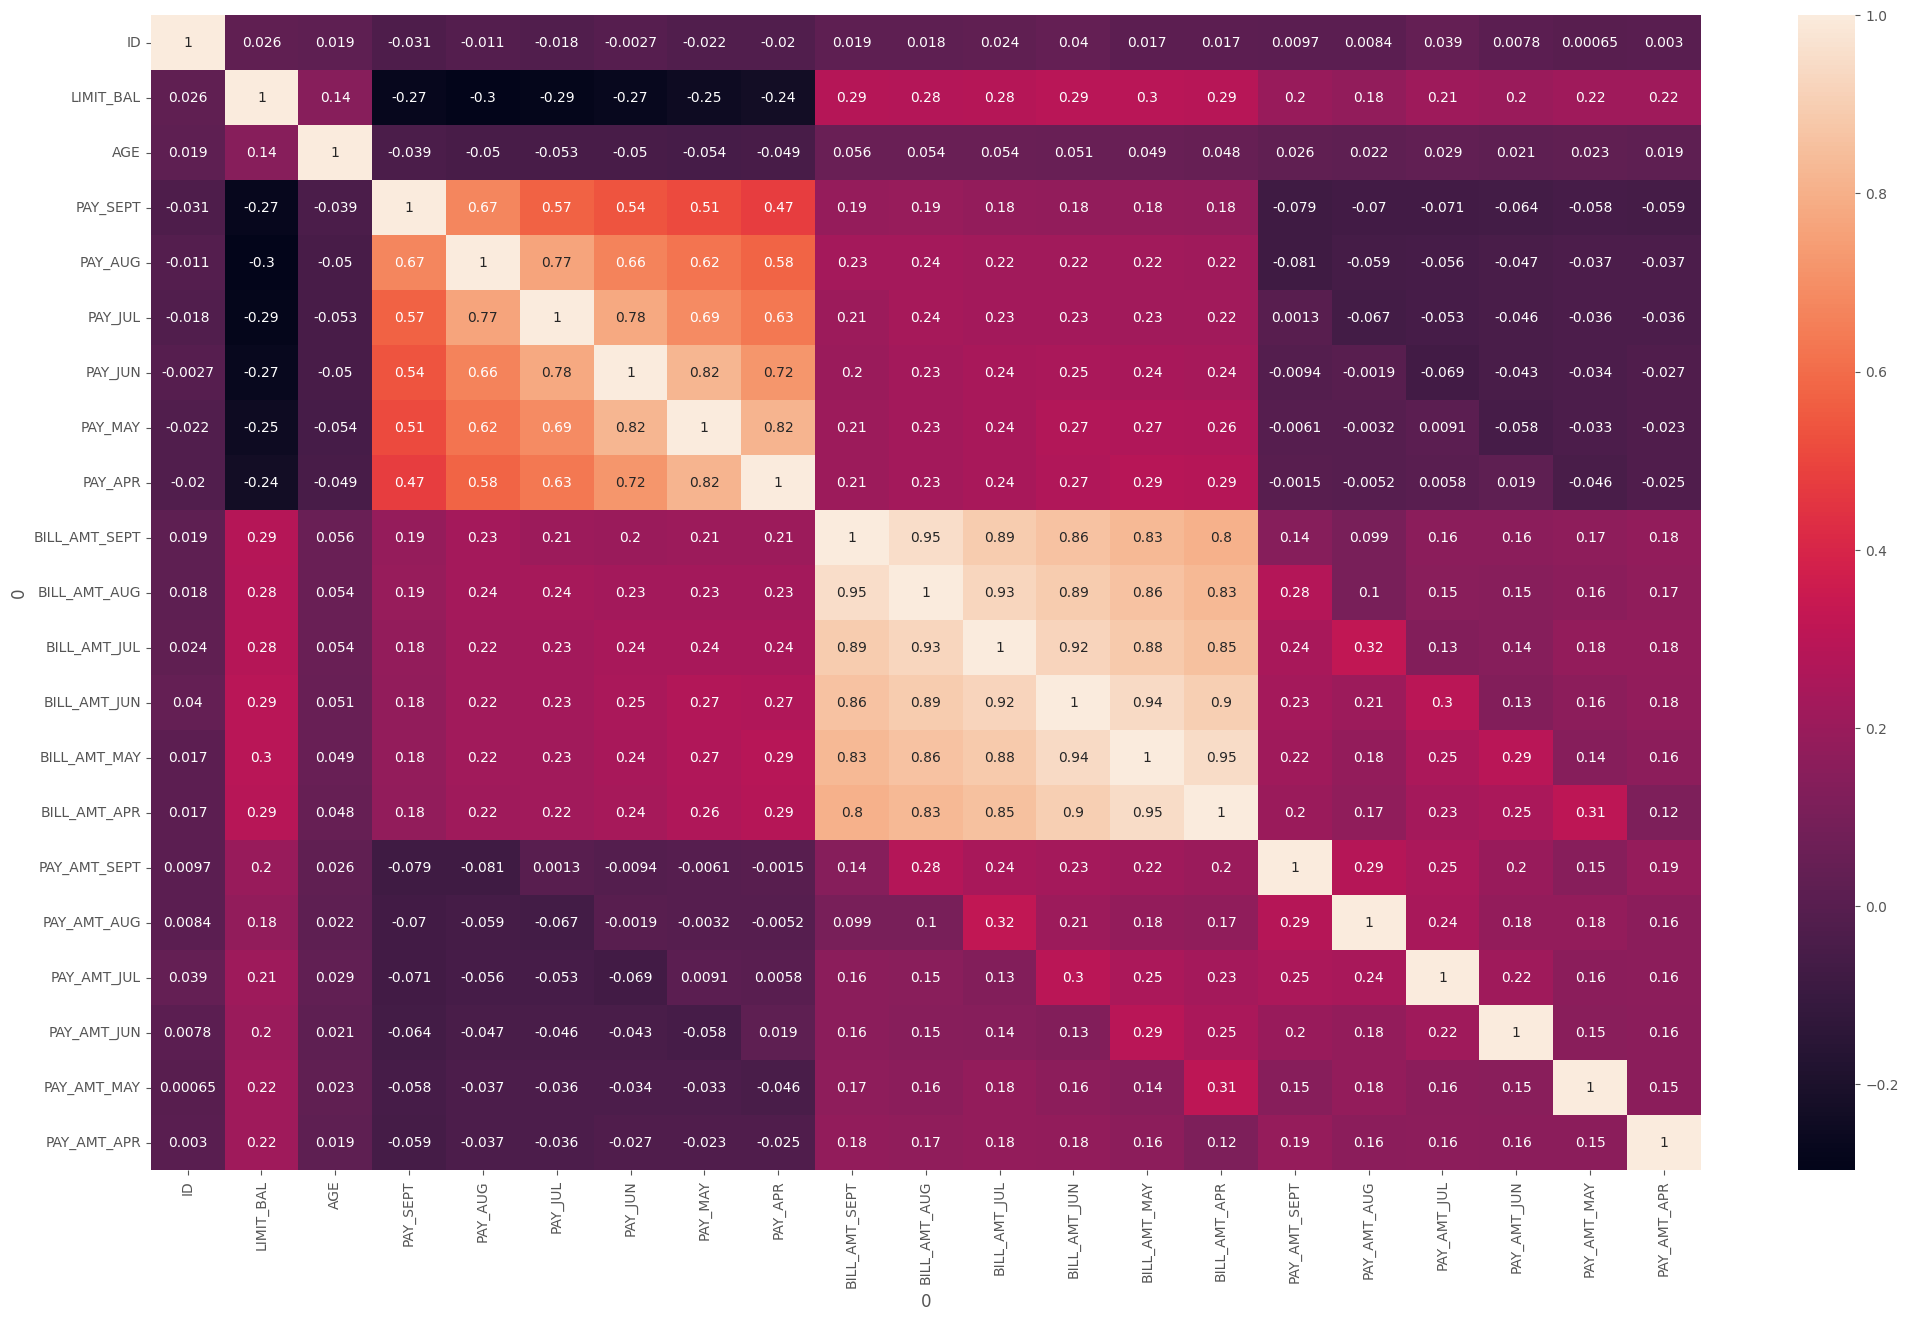

In [42]:
# Correlation Heatmap visualization code
plt.figure(figsize = [25, 15])
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is used to plot the correlation between the parameters of the dataset.

##### 2. What is/are the insight(s) found from the chart?

There isn't a clear correlation between the parameters.

#### Chart - 15 - Pair Plot 

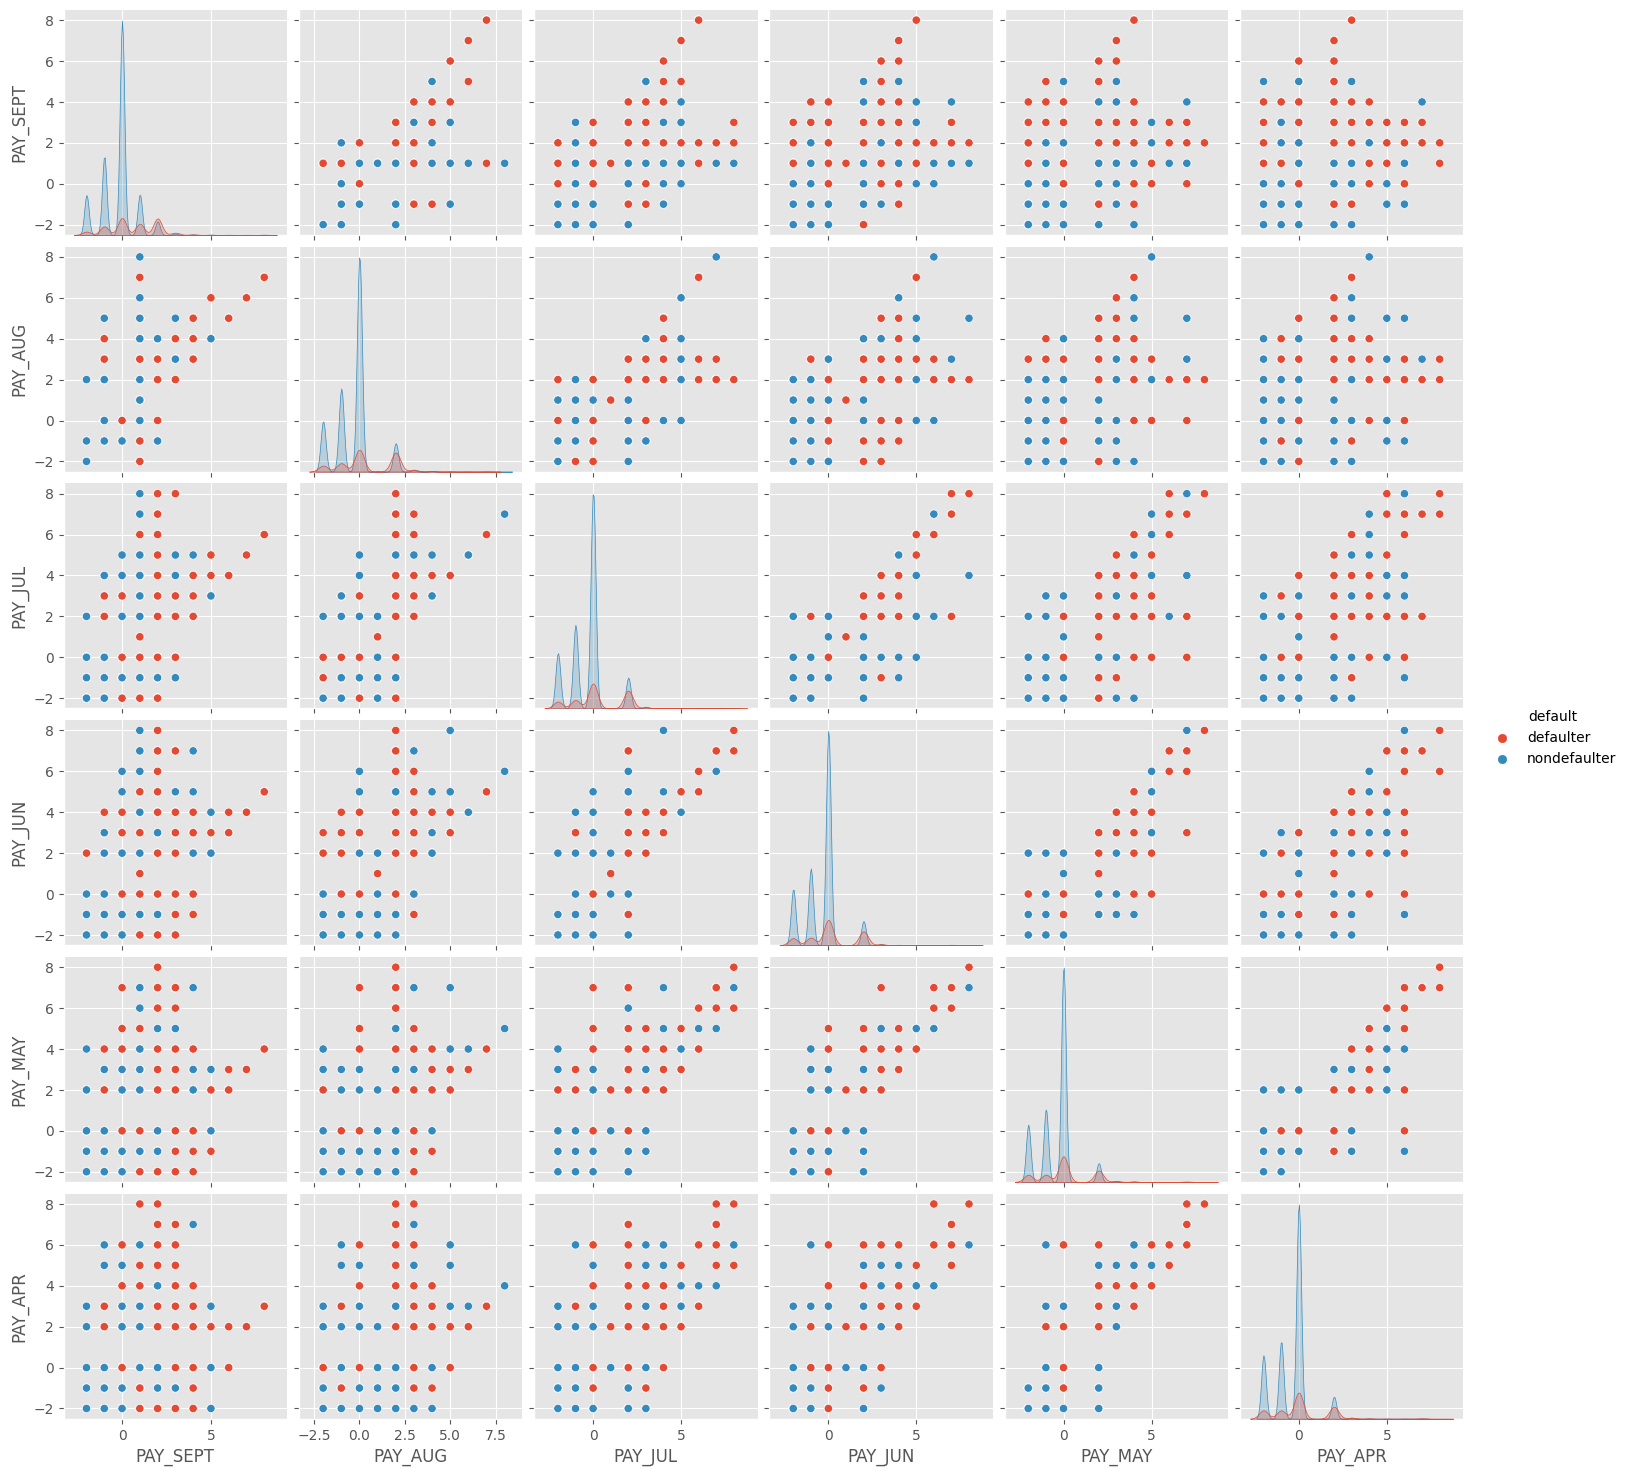

In [43]:
# Plotting the pair plot for payment and default comparison
payment=df[["PAY_SEPT","PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APR",'default']]
sns.pairplot(data=payment,hue = 'default')

##### 1. Why did you pick the specific chart?

Pair plot shows the comparison between multiple variables.

##### 2. What is/are the insight(s) found from the chart?

It clearly shows the defaulters compared to the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# creating a copy of the dataset
df_copy=df.copy()

In [45]:
# Handling Missing Values & Missing Value Imputation
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             30000 non-null  int64 
 1   LIMIT_BAL      30000 non-null  int64 
 2   SEX            30000 non-null  object
 3   EDUCATION      30000 non-null  object
 4   MARRIAGE       30000 non-null  object
 5   AGE            30000 non-null  int64 
 6   PAY_SEPT       30000 non-null  int64 
 7   PAY_AUG        30000 non-null  int64 
 8   PAY_JUL        30000 non-null  int64 
 9   PAY_JUN        30000 non-null  int64 
 10  PAY_MAY        30000 non-null  int64 
 11  PAY_APR        30000 non-null  int64 
 12  BILL_AMT_SEPT  30000 non-null  int64 
 13  BILL_AMT_AUG   30000 non-null  int64 
 14  BILL_AMT_JUL   30000 non-null  int64 
 15  BILL_AMT_JUN   30000 non-null  int64 
 16  BILL_AMT_MAY   30000 non-null  int64 
 17  BILL_AMT_APR   30000 non-null  int64 
 18  PAY_AMT_SEPT   30000 non-n

In [46]:
# Checking for the missing values
df_copy.isna().sum()

0
ID               0
LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
default          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in the dataset

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments
# Naming dependent and independent variables
# independant variable
independent_var=[ 'LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE','AGE','PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT', 'BILL_AMT_APR',
       'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG',
       'BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']
# dependent variable
dependent_var=["default"]

In [48]:
# Naming numerical and categorical columns
# numeric columns
numeric_cols=['LIMIT_BAL','AGE', 'BILL_AMT_APR',
       'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG',
       'BILL_AMT_SEPT', 'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT']

#categorical columns
categorical_cols=['SEX', 'EDUCATION', 'MARRIAGE','PAY_APR',
       'PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT' ]

In [49]:
# checking for outliers
for col in numeric_cols:
    upper = df_copy[col].quantile(0.75) + 1.5 * (df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25))
    outliers = df_copy[df_copy[col] > upper][col].count()
    print("{}: {}".format(col, outliers))

LIMIT_BAL: 167
AGE: 272
BILL_AMT_APR: 2688
BILL_AMT_MAY: 2724
BILL_AMT_JUN: 2620
BILL_AMT_JUL: 2468
BILL_AMT_AUG: 2395
BILL_AMT_SEPT: 2398
PAY_AMT_APR: 2958
PAY_AMT_MAY: 2945
PAY_AMT_JUN: 2994
PAY_AMT_JUL: 2598
PAY_AMT_AUG: 2714
PAY_AMT_SEPT: 2745


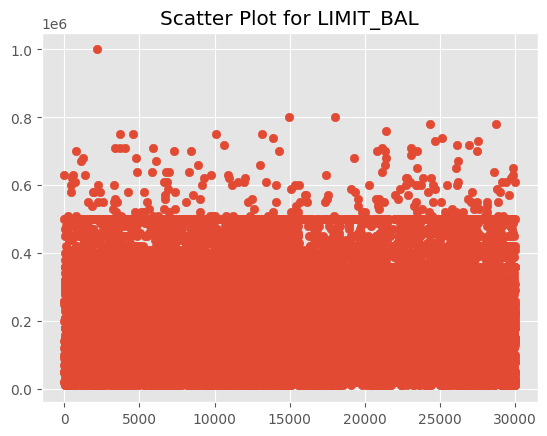

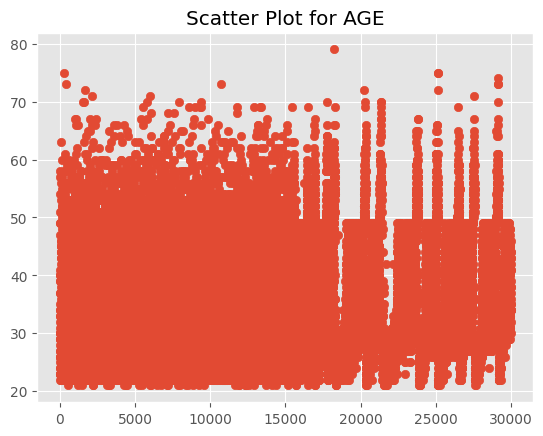

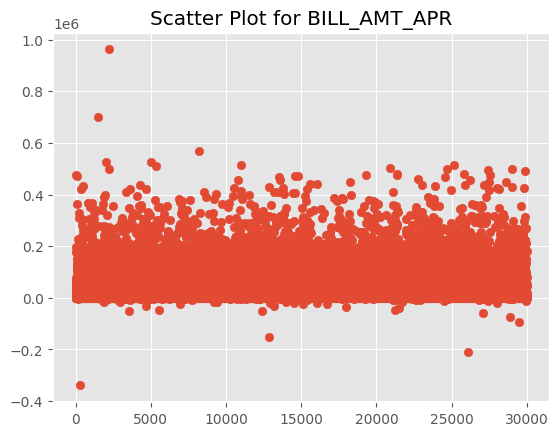

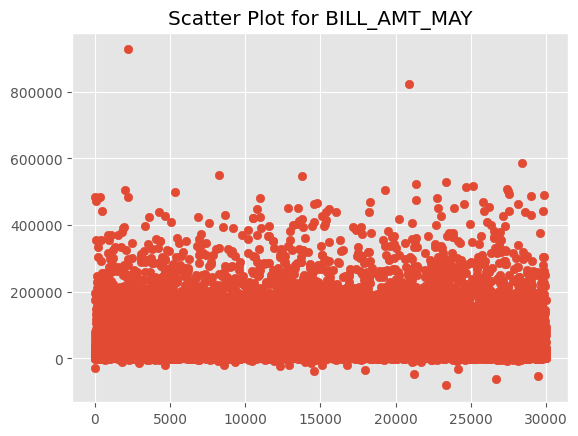

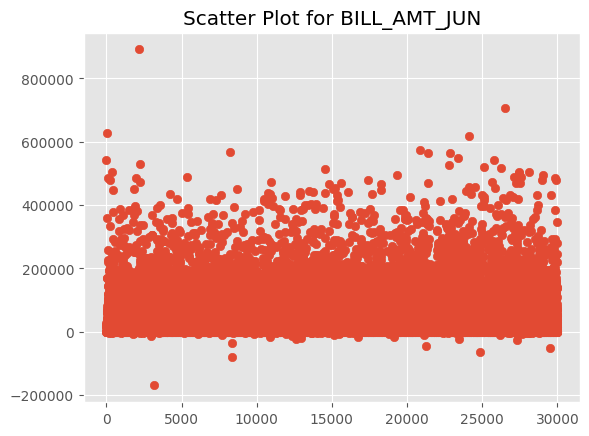

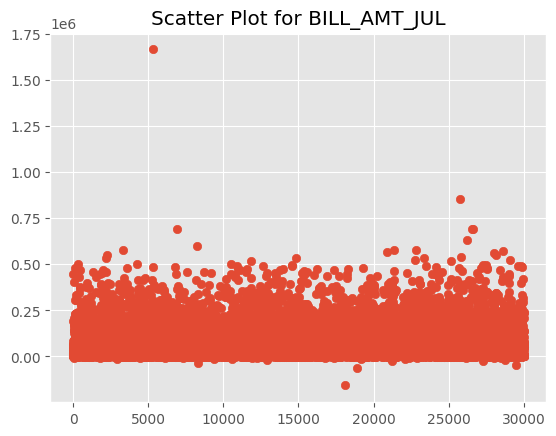

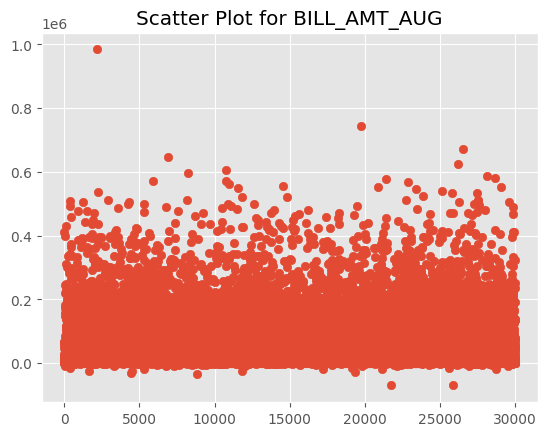

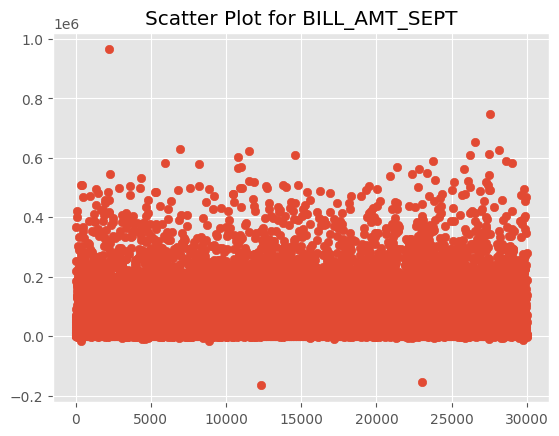

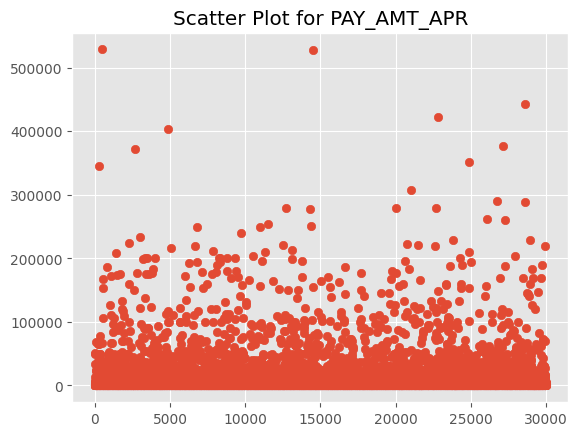

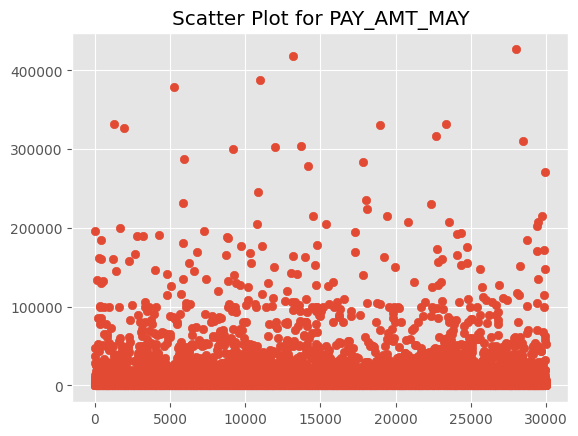

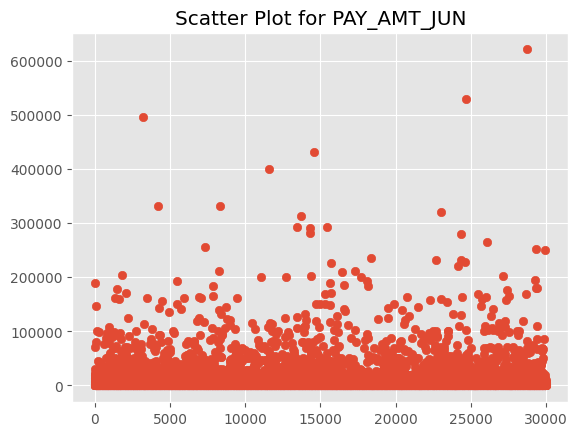

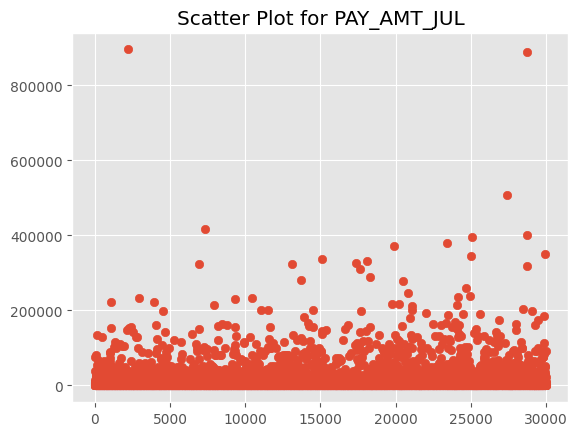

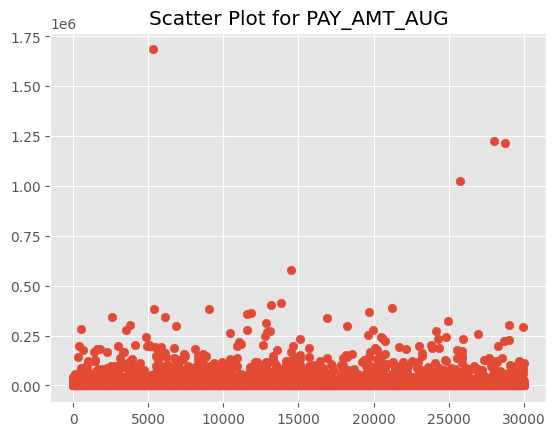

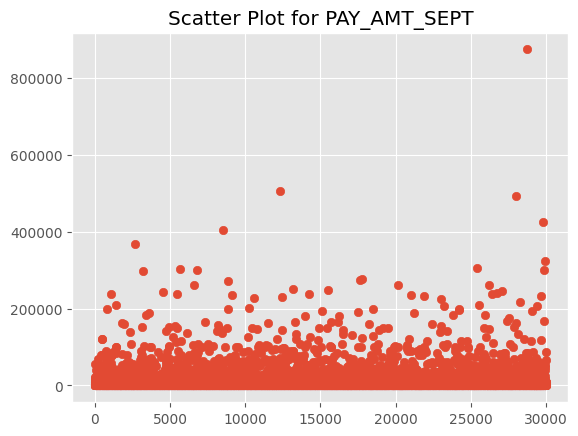

In [50]:
# Visualizing the outliers of columns using scatter plot 
for col in numeric_cols:
  plt.scatter(range(len(df_copy[col])), df_copy[col])
  plt.title(f"Scatter Plot for {col}")
  plt.show()

Using capping for outlier treatmet

In [51]:
#Capping Outlier using IQR method 
for col in numeric_cols:
    upper = df_copy[col].quantile(0.75) + 1.5 * (df_copy[col].quantile(0.75) - df_copy[col].quantile(0.25))
    df_copy[col] = np.where(df_copy[col] > upper, upper, df_copy[col])
    print("{}: {}".format(col, outliers))

LIMIT_BAL: 2745
AGE: 2745
BILL_AMT_APR: 2745
BILL_AMT_MAY: 2745
BILL_AMT_JUN: 2745
BILL_AMT_JUL: 2745
BILL_AMT_AUG: 2745
BILL_AMT_SEPT: 2745
PAY_AMT_APR: 2745
PAY_AMT_MAY: 2745
PAY_AMT_JUN: 2745
PAY_AMT_JUL: 2745
PAY_AMT_AUG: 2745
PAY_AMT_SEPT: 2745


Checking with box plot

 Box Plot of LIMIT_BAL


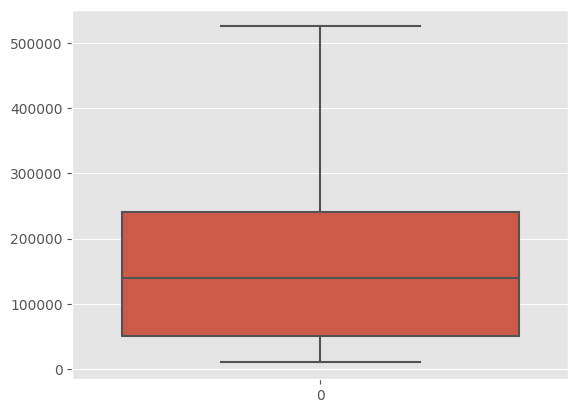

 Box Plot of AGE


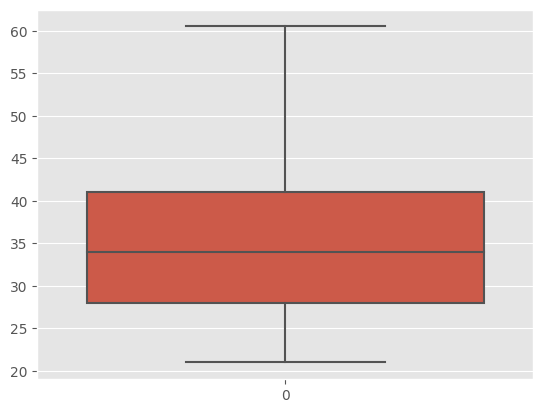

 Box Plot of BILL_AMT_APR


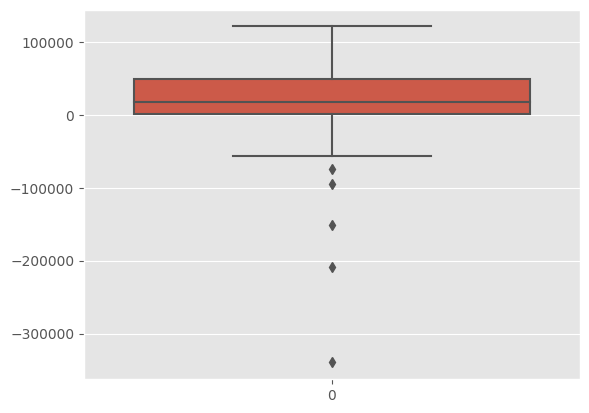

 Box Plot of BILL_AMT_MAY


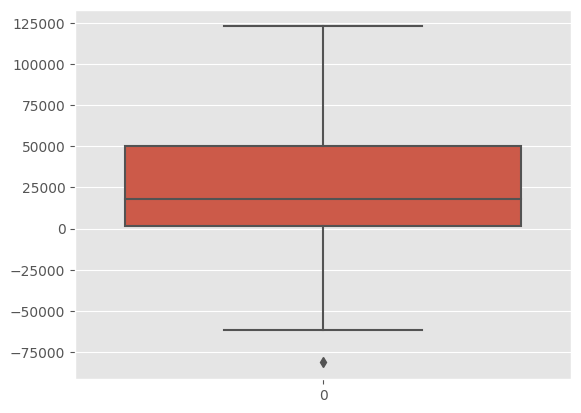

 Box Plot of BILL_AMT_JUN


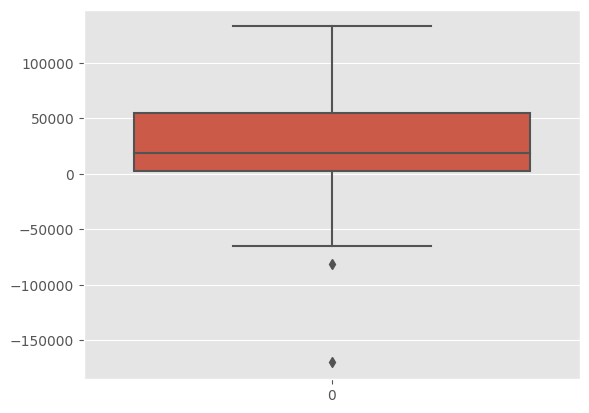

 Box Plot of BILL_AMT_JUL


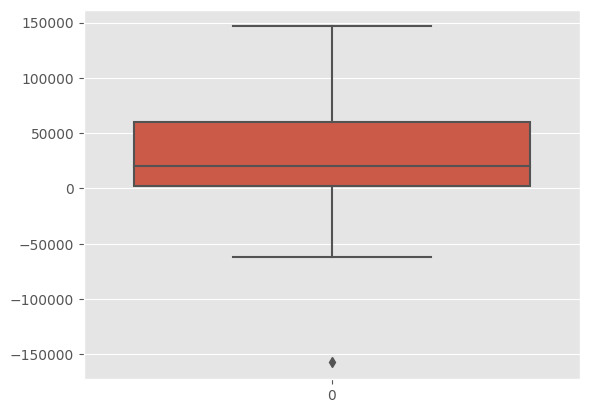

 Box Plot of BILL_AMT_AUG


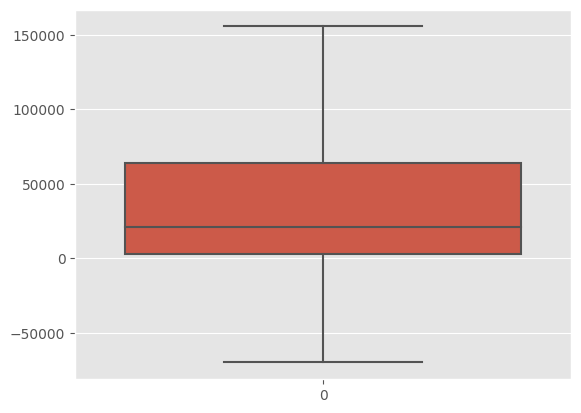

 Box Plot of BILL_AMT_SEPT


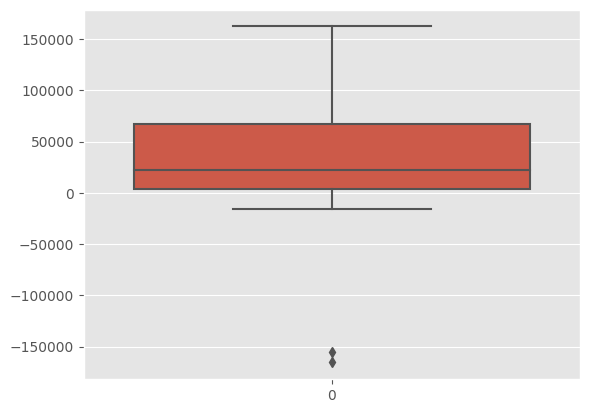

 Box Plot of PAY_AMT_APR


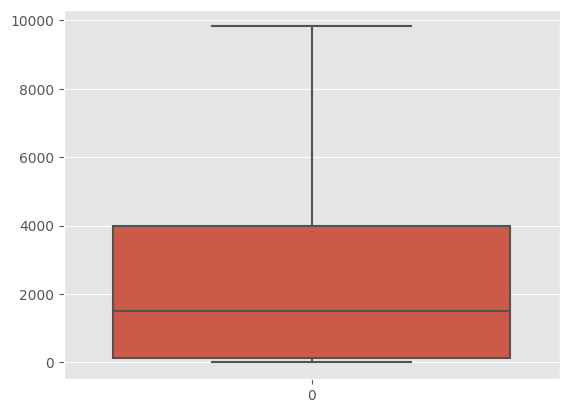

 Box Plot of PAY_AMT_MAY


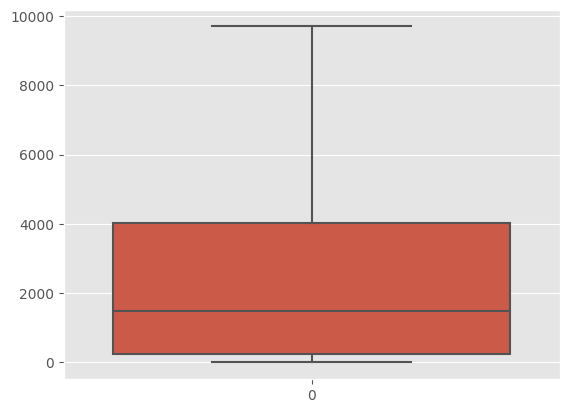

 Box Plot of PAY_AMT_JUN


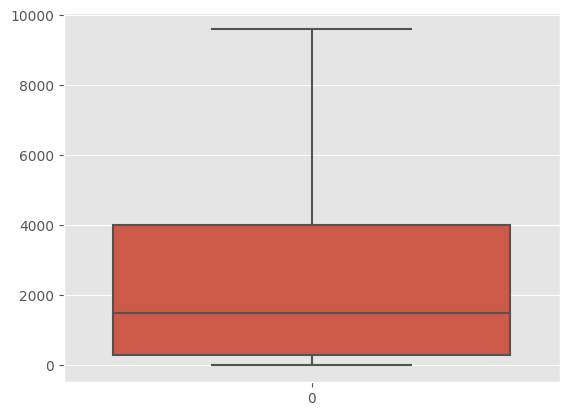

 Box Plot of PAY_AMT_JUL


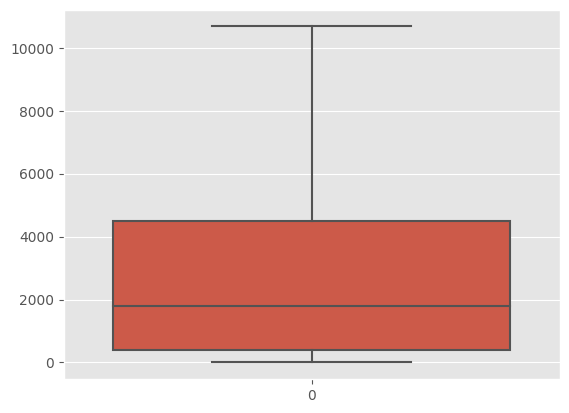

 Box Plot of PAY_AMT_AUG


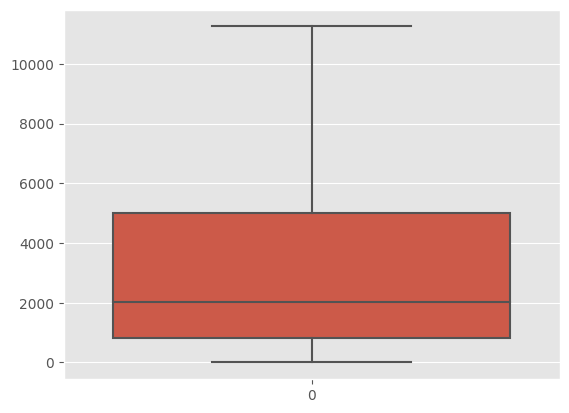

 Box Plot of PAY_AMT_SEPT


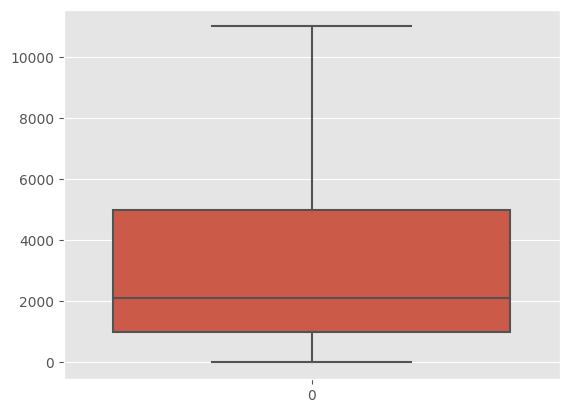

In [52]:
#using boxplot to observe that after capping we elimated the ouliers or not
for col in numeric_cols:
    sns.boxplot(df_copy[col])
    print(' Box Plot of',col)
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used IQR method for outlier treatment.
The Interquartile Range (IQR) is a robust measure of variability that is often used to identify outliers in skewed (non-normal) data. The IQR is calculated as the difference between the 75th and 25th percentiles of a dataset and provides a summary of the spread of the middle 50% of the data. Outliers are defined as observations that fall outside of the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR, where Q1 is the 25th percentile and Q3 is the 75th percentile.

the IQR techniques are used to handle right or left skewed data and it is efficient to use IQR.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features
# Removing some of the negative value that were present in the columns
def replace_values(df_copy, col, values):
    '''all values of -2, -1, and 0 in the specified columns of the dataframe being replaced with 0 , columns are 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR' '''
    fil = (df_copy[col] == -2) | (df_copy[col] == -1) | (df_copy[col] == 0)
    df_copy.loc[fil, col] = values

columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
values = 0

for col in columns:
    replace_values(df_copy, col, values)

we have created this function to check if there are negative values in the columns and if there are then change them 0.

In [54]:
#Function to replace negative bill amount
def replace_values(df_copy, col, values):
    #  This code is replacing all values greater then 0 in the specified columns with 0.
    fil = (df_copy[col] < 0)
    df_copy.loc[fil, col] = values

columns = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
values = 0

for col in columns:
    replace_values(df_copy, col, values)


In [55]:
# Printing the columns
df_copy.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default'],
      dtype='object', name=0)

As bills that are paid are shown as negative values in the dataset we are removing them and replacing by 0.

#### 2. Feature Selection

Changing non default column values to 0.

In [56]:
# Now again replacing the values in the default column to numerical value for further analysis
df_copy['default'].replace({'defaulter' : 1, 'nondefaulter' :0},inplace = True)

In [57]:
# Select your features wisely to avoid overfitting

#making changes who have not defaulted in any month cannot be potential defaulters hence, we have transformed the data as below.
fil = (df_copy.PAY_SEPT == 0) & (df_copy.PAY_AUG == 0) & (df_copy.PAY_JUL == 0) & (df_copy.PAY_JUN == 0) & (df_copy.PAY_MAY == 0) & (df_copy.PAY_APR == 0) & (df_copy.default ==1)
df_copy.loc[fil,'default'] = 0

Now making corrections in the data where a customer has default in every month and filling it with 1.

In [58]:
# making changes for customers who have defaulted in every month are the potential defaulters hence, we have transformed the data as below.
fil = (df_copy.PAY_SEPT> 0) & (df_copy.PAY_AUG > 0) & (df_copy.PAY_JUL > 0) & (df_copy.PAY_JUN > 0) & (df_copy.PAY_MAY > 0) & (df_copy.PAY_APR > 0) & (df_copy.default ==0)
df_copy.loc[fil,'default'] = 1
     

creating groups of ages

In [59]:
#converting Age column in Categorical values 
def categorize_age(age):
    ''' applying the categorize_age function to the AGE column of the dataframe,
     the original ages in the column are transformed into categorical values.'''
    if 21 <= age < 41:
        return 1
    elif 41 <= age < 61:
        return 2
    elif 61 <= age < 81:
        return 3

df_copy['AGE'] = df_copy['AGE'].apply(categorize_age)

Creating groups in pay columns

In [60]:
# Binning categorical columns 'PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'
def bins(x):
    if x == -2:
        return '0'
    if x == 0:
        return '0'
    if x == -1:
        return '0'
    if x in range(1,4):
        return '1 to 3'
    if x in range(4,7):
        return '4 to 6'
    if x in range(7,9):
        return '7 to 9'

for i in df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']]:
    df_copy[i]=df_copy[i].apply(bins)
     

In [61]:
# looking through the dataset again
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000.0,FEMALE,university,married,1,1 to 3,1 to 3,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,FEMALE,university,single,1,0,1 to 3,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,FEMALE,university,single,1,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,FEMALE,university,married,1,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,MALE,university,married,2,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


### 3. Categorical Encoding

In [62]:
# Encode your categorical columns
# replacing the gender 1 i.e male with 0 and 2 i.e female with 1
df_copy["SEX"].replace({'MALE':0},inplace=True)

#Printing the changes
df_copy.SEX.unique()

array(['FEMALE', 0], dtype=object)

In [63]:
# replacing the gender 1 i.e male with 0 and 2 i.e male with 0
df_copy["SEX"].replace({'FEMALE':1},inplace=True)

#printing the changes
df_copy.SEX.unique()
     

array([1, 0])

In [64]:
#categorical columns
categorical_cols_to_encode=['EDUCATION', 'MARRIAGE','PAY_APR','PAY_MAY', 'PAY_JUN', 'PAY_JUL', 'PAY_AUG', 'PAY_SEPT' ]

In [65]:
# Encoding the categorical columns using onehotencoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df_copy[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols_to_encode))
df_copy[encoded_cols] = encoder.transform(df_copy[categorical_cols_to_encode])

# printing the categorical columns
print(encoded_cols)

['EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_APR_0', 'PAY_APR_1 to 3', 'PAY_APR_4 to 6', 'PAY_APR_7 to 9', 'PAY_MAY_0', 'PAY_MAY_1 to 3', 'PAY_MAY_4 to 6', 'PAY_MAY_7 to 9', 'PAY_JUN_0', 'PAY_JUN_1 to 3', 'PAY_JUN_4 to 6', 'PAY_JUN_7 to 9', 'PAY_JUL_0', 'PAY_JUL_1 to 3', 'PAY_JUL_4 to 6', 'PAY_JUL_7 to 9', 'PAY_AUG_0', 'PAY_AUG_1 to 3', 'PAY_AUG_4 to 6', 'PAY_AUG_7 to 9', 'PAY_SEPT_0', 'PAY_SEPT_1 to 3', 'PAY_SEPT_4 to 6', 'PAY_SEPT_7 to 9']


In [66]:
# droping the orignal columns
df_copy.drop(['EDUCATION','MARRIAGE','PAY_APR','PAY_MAY','PAY_JUN','PAY_JUL','PAY_AUG','PAY_SEPT'],axis=1,inplace=True)

# looking for changes done after onehotencoding
df_copy

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_JUL_4 to 6,PAY_JUL_7 to 9,PAY_AUG_0,PAY_AUG_1 to 3,PAY_AUG_4 to 6,PAY_AUG_7 to 9,PAY_SEPT_0,PAY_SEPT_1 to 3,PAY_SEPT_4 to 6,PAY_SEPT_7 to 9
0,1,20000.0,1,1,3913.000,3102.0,689.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,120000.0,1,1,2682.000,1725.0,2682.0,3272.0,3455.0,3261.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,90000.0,1,1,29239.000,14027.0,13559.0,14331.0,14948.0,15549.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,50000.0,1,1,46990.000,48233.0,49291.0,28314.0,28959.0,29547.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,50000.0,0,2,8617.000,5670.0,35835.0,20940.0,19146.0,19131.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,0,1,162389.375,155538.5,146412.5,88004.0,31237.0,15980.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29996,29997,150000.0,0,2,1683.000,1828.0,3502.0,8979.0,5190.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29997,29998,30000.0,0,1,3565.000,3356.0,2758.0,20878.0,20582.0,19357.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,29999,80000.0,0,2,0.000,78379.0,76304.0,52774.0,11855.0,48944.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
# Checking the shape again
df_copy.shape

(30000, 48)

### 8. Data Splitting

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.
# independent variable (estimator)
X = df_copy.drop("default", axis = 1)

# dependent variable (label)
y = df_copy["default"]

In [69]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True, stratify=y, random_state = 42)

##### What data splitting ratio have you used and why? 

We have used test-train split as 30%-70%

### 6. Data Scaling

In [70]:
# Scaling your data
#  initializes the scaler object
scaler = StandardScaler()

# fitting the scaler object to the training data
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

### 9. Handling Imbalanced Dataset

In [71]:
# Checking the value counts in the default column
df_copy.default.value_counts()

0    25300
1     4700
Name: default, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

with the count of the values it is clear that the data is imbalanced.

 Using SMOTE to handle the imbalanced dataset

In [72]:
# Handling Imbalanced Dataset
# Initializing the SMOTE
smote = SMOTE()

In [73]:
# Making 2 variable X_train_smote, y_train_smote and fitting 
X_train_smote, y_train_smote = smote.fit_resample(X,y)

# printing the values before and after
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 17710, 1: 3290})
After SMOTE : Counter({1: 25300, 0: 25300})


In [74]:
# Looking for shape of Original dataset shape & Resampled dataset shape
print('Original dataset shape', len(df_copy))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 30000
Resampled dataset shape 50600


In [75]:
# making variable for column with each and every columns in dataset
columns = list(df_copy.columns)
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'AGE',
 'BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'PAY_AMT_SEPT',
 'PAY_AMT_AUG',
 'PAY_AMT_JUL',
 'PAY_AMT_JUN',
 'PAY_AMT_MAY',
 'PAY_AMT_APR',
 'default',
 'EDUCATION_graduate school',
 'EDUCATION_high school',
 'EDUCATION_others',
 'EDUCATION_university',
 'MARRIAGE_married',
 'MARRIAGE_others',
 'MARRIAGE_single',
 'PAY_APR_0',
 'PAY_APR_1 to 3',
 'PAY_APR_4 to 6',
 'PAY_APR_7 to 9',
 'PAY_MAY_0',
 'PAY_MAY_1 to 3',
 'PAY_MAY_4 to 6',
 'PAY_MAY_7 to 9',
 'PAY_JUN_0',
 'PAY_JUN_1 to 3',
 'PAY_JUN_4 to 6',
 'PAY_JUN_7 to 9',
 'PAY_JUL_0',
 'PAY_JUL_1 to 3',
 'PAY_JUL_4 to 6',
 'PAY_JUL_7 to 9',
 'PAY_AUG_0',
 'PAY_AUG_1 to 3',
 'PAY_AUG_4 to 6',
 'PAY_AUG_7 to 9',
 'PAY_SEPT_0',
 'PAY_SEPT_1 to 3',
 'PAY_SEPT_4 to 6',
 'PAY_SEPT_7 to 9']

In [76]:
# droping orignal columns
df_copy.drop(['default'],axis=1,inplace=True)

In [77]:
#Creating a new Dataframe with balanced data
balanced_df = pd.DataFrame(X_train_smote, columns=columns)

In [78]:
# storing default in y_train_smote 
balanced_df['default'] = y_train_smote

#checking shape of new dataframe
balanced_df.shape

(50600, 48)

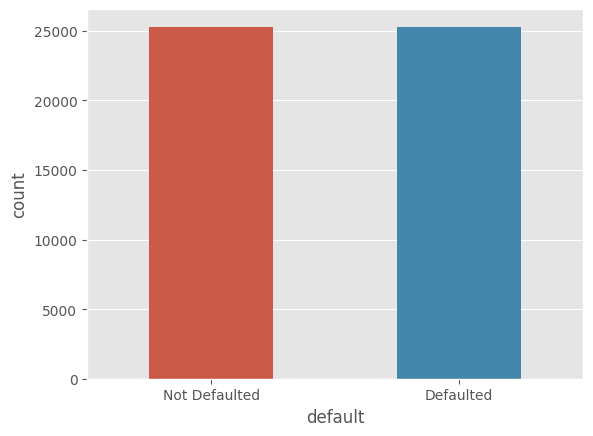

In [79]:
#plotting balanced data using countplot
ax = sns.countplot(x='default', data = balanced_df,width = 0.5)
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()
     

We can see that the data is now balanced.

In [80]:
# independent variable (estimator)
X = balanced_df.drop("default", axis = 1)

# dependent variable (label)
y = balanced_df["default"]

In [81]:
# Splitting again to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify=y, random_state = 42)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE to handle the imbalanced dataset.
The technique used to handle the imbalanced dataset is "SMOTE" (Synthetic Minority Over-sampling Technique). It is a popular oversampling technique for handling imbalanced datasets by generating synthetic samples of the minority class.
SMOTE works by selecting similar samples in the feature space and creating new samples by interpolating between them. The new samples are added to the original dataset to balance the class distribution.


## ***7. ML Model Implementation***

Creating a function for model implementation and printing its metrics

In [82]:
# creating the function
def performance_metrics(model, X_train, y_train, X_test, y_test):
    # fitting the model
    model.fit(X_train, y_train)
    
    # Predicting with train and test data
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)
    
    # Calculating the evaluation and performance metrics
    train_accuracy = accuracy_score(y_train, train_class_preds)
    test_accuracy = accuracy_score(y_test, test_class_preds)
    train_precision = precision_score(y_train, train_class_preds)
    test_precision = precision_score(y_test, test_class_preds)
    train_recall = recall_score(y_train, train_class_preds)
    test_recall = recall_score(y_test, test_class_preds)
    train_f1 = f1_score(y_train, train_class_preds)
    test_f1 = f1_score(y_test, test_class_preds)
    train_roc_auc = roc_auc_score(y_train, train_class_preds)
    test_roc_auc = roc_auc_score(y_test, test_class_preds)
    
    # Storing the values of performance and evaluation metrics in a dictionary
    evaluation_metrics =OrderedDict([
    ('Train Accuracy: {:.2f}%'.format(train_accuracy*100), None),
    ('Test Accuracy: {:.2f}%'.format(test_accuracy*100), None),
    ('Train Precision: {:.2f}%'.format(train_precision*100), None),
    ('Test Precision: {:.2f}%'.format(test_precision*100), None),
    ('Train Recall: {:.2f}%'.format(train_recall*100), None),
    ('Test Recall: {:.2f}%'.format(test_recall*100), None),
    ('Train F1 Score: {:.2f}%'.format(train_f1*100), None),
    ('Test F1 Score: {:.2f}%'.format(test_f1*100), None),
    ('Train ROC-AUC: {:.2f}%'.format(train_roc_auc*100), None),
    ('Test ROC-AUC: {:.2f}%'.format(test_roc_auc*100), None)

])
    
    return evaluation_metrics

### ML Model - 1 Random forest classifier

In [83]:
# ML Model - 1 Implementation
# creating the model instance
random_forest = RandomForestClassifier()

In [84]:
# Using the function to get the values
performance_metrics(random_forest, X_train,y_train,X_test,y_test)

OrderedDict([('Train Accuracy: 100.00%', None),
             ('Test Accuracy: 94.70%', None),
             ('Train Precision: 100.00%', None),
             ('Test Precision: 94.77%', None),
             ('Train Recall: 100.00%', None),
             ('Test Recall: 94.61%', None),
             ('Train F1 Score: 100.00%', None),
             ('Test F1 Score: 94.69%', None),
             ('Train ROC-AUC: 100.00%', None),
             ('Test ROC-AUC: 94.70%', None)])

#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Creating the instance for randomsearchcv 
random_search = RandomizedSearchCV(estimator = random_forest,param_distributions= {'max_depth': [10,20,30],'min_samples_leaf': [3, 4, 5],
                                                    'min_samples_split': [5, 8, 10],'n_estimators': [100, 150, 200]},scoring = 'accuracy'
                                                    ,cv = 3, n_jobs = -1, verbose = 1)
# Fitting the Algorithm
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [86]:
#getting the best parameters
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 20}

In [87]:
#getting the best score
random_search.best_score_

0.9391305151931036

In [88]:
# printing the performance after hyperparameter tunning
performance_metrics(random_search, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


OrderedDict([('Train Accuracy: 98.25%', None),
             ('Test Accuracy: 94.58%', None),
             ('Train Precision: 98.53%', None),
             ('Test Precision: 94.37%', None),
             ('Train Recall: 97.96%', None),
             ('Test Recall: 94.81%', None),
             ('Train F1 Score: 98.24%', None),
             ('Test F1 Score: 94.59%', None),
             ('Train ROC-AUC: 98.25%', None),
             ('Test ROC-AUC: 94.58%', None)])

In [89]:
#  Predicting with the model
train_class_preds = random_search.predict(X_train)
test_class_preds = random_search.predict(X_test)

Confusion metrics

[[7161  429]
 [ 394 7196]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

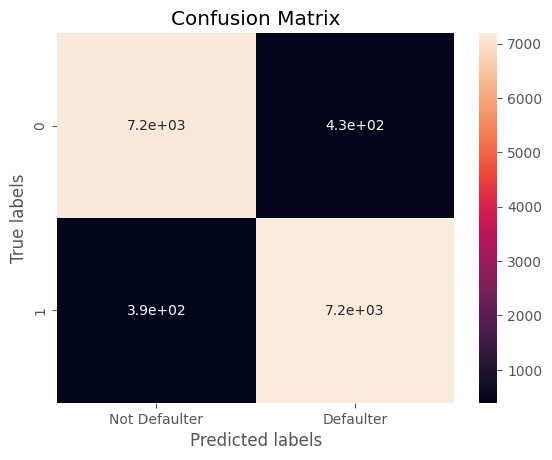

In [90]:
# Printing the confusion matrix for performance evaluation
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

Checking the important features

In [91]:
#storing best estimator in varibale
optimal__rfc_model=random_search.best_estimator_

In [92]:
# creating new dataframe for feature importance
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal__rfc_model.feature_importances_)})
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

RandomForestClassifier(max_depth=30, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=200)


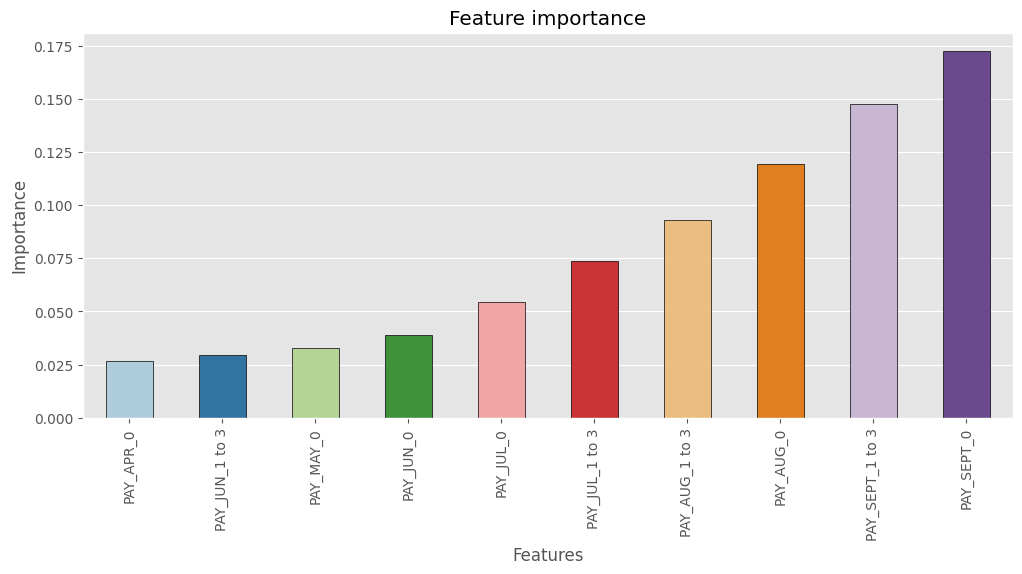

In [93]:
# Visualizing the feature importance using a bargraph
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(12,5))
print(optimal__rfc_model) 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance',width = 0.5,edgecolor = 'black', palette = 'Paired')
plt.xticks(rotation=90);
plt.title('Feature importance')
plt.show()

Most important feature is PAY_SEPT_1to3

##### Which hyperparameter optimization technique have you used and why?

We have used Randomsearchcv for hyperparameter tuning.
RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning we see that score have dropped slightly.

### ML Model - 2 LightGBM 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Importing the model library
import lightgbm as lgb

In [95]:
# Creating the instance
ligthGBM_class = lgb.LGBMClassifier()

In [96]:
# Printing the performance metrics
performance_metrics(ligthGBM_class,X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 96.72%', None),
             ('Test Accuracy: 94.52%', None),
             ('Train Precision: 97.04%', None),
             ('Test Precision: 94.98%', None),
             ('Train Recall: 96.39%', None),
             ('Test Recall: 94.01%', None),
             ('Train F1 Score: 96.71%', None),
             ('Test F1 Score: 94.49%', None),
             ('Train ROC-AUC: 96.72%', None),
             ('Test ROC-AUC: 94.52%', None)])

#### 2. Cross- Validation & Hyperparameter Tuning

Gridsearchcv

In [97]:
# finding the best parameters for LightGBM by gridsearchcv
ligthGBM_class_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
ligthGBM_class_grid=GridSearchCV(estimator=ligthGBM_class,param_grid=ligthGBM_class_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [98]:
# training and evaluating the lgbr_grid
performance_metrics(ligthGBM_class_grid,X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


OrderedDict([('Train Accuracy: 97.85%', None),
             ('Test Accuracy: 94.42%', None),
             ('Train Precision: 98.04%', None),
             ('Test Precision: 94.92%', None),
             ('Train Recall: 97.66%', None),
             ('Test Recall: 93.86%', None),
             ('Train F1 Score: 97.85%', None),
             ('Test F1 Score: 94.39%', None),
             ('Train ROC-AUC: 97.85%', None),
             ('Test ROC-AUC: 94.42%', None)])

Feature Importance

In [99]:
#storing best estimator in varibale
optimal__lgbm_model=ligthGBM_class_grid.best_estimator_

In [100]:
# getting the feature importance
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal__lgbm_model.feature_importances_)})
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

LGBMClassifier(max_depth=10, n_estimators=150)


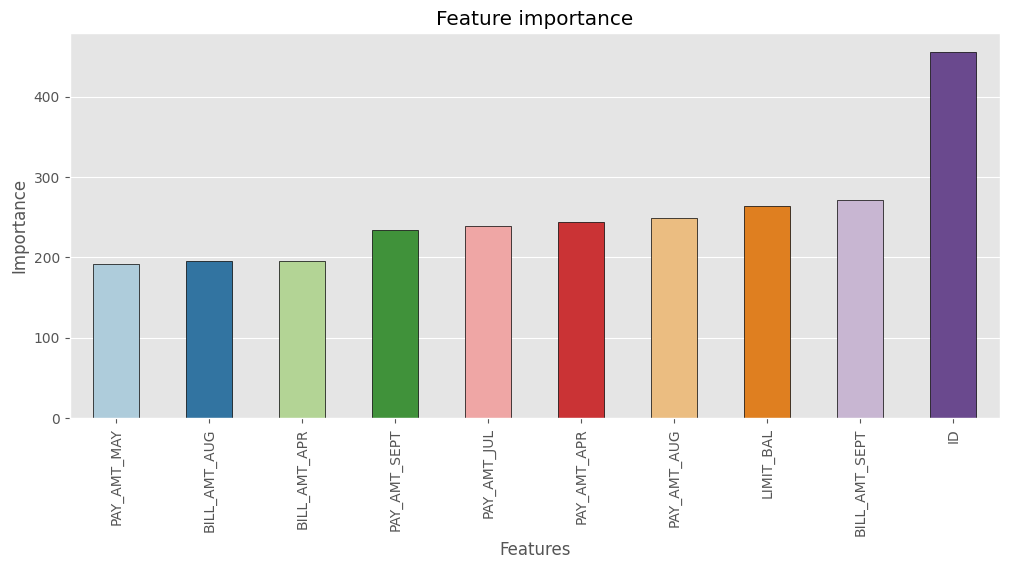

In [101]:
# Visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(12,5))
print(optimal__lgbm_model) 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance',width = 0.5,edgecolor = 'black', palette = 'Paired')
plt.xticks(rotation=90);
plt.title('Feature importance')
plt.show()

In LightBGM ID is the most important feature

##### Which hyperparameter optimization technique have you used and why?

We have used GridsearchCV for hyperparameter tuning.
it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the results of the evaluation and performance metrics we can see that there is an improvement in the score.

### ML Model - 3 XGBOOST

In [102]:
# creating Instance of XGBClassifier
XG= XGBClassifier(random_state=123)

# Printing the performance metrics
performance_metrics(XG, X_train, y_train, X_test, y_test)

OrderedDict([('Train Accuracy: 99.16%', None),
             ('Test Accuracy: 94.31%', None),
             ('Train Precision: 99.31%', None),
             ('Test Precision: 95.01%', None),
             ('Train Recall: 99.00%', None),
             ('Test Recall: 93.53%', None),
             ('Train F1 Score: 99.15%', None),
             ('Test F1 Score: 94.26%', None),
             ('Train ROC-AUC: 99.16%', None),
             ('Test ROC-AUC: 94.31%', None)])

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [104]:
# Instantiate Random search model
XGboost = RandomizedSearchCV(estimator = XG,param_distributions= param_dict,  scoring = 'accuracy',  
                                   cv = 3, n_jobs = -1, verbose = 1)
     

In [105]:
# Calling function we made evaluation_metrics for XGboost 
performance_metrics(XGboost, X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[07:21:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



OrderedDict([('Train Accuracy: 95.81%', None),
             ('Test Accuracy: 94.32%', None),
             ('Train Precision: 96.16%', None),
             ('Test Precision: 94.66%', None),
             ('Train Recall: 95.43%', None),
             ('Test Recall: 93.94%', None),
             ('Train F1 Score: 95.79%', None),
             ('Test F1 Score: 94.30%', None),
             ('Train ROC-AUC: 95.81%', None),
             ('Test ROC-AUC: 94.32%', None)])

feature Importance

In [106]:
# Storing best estimator in varibale
optimal__xg_model=XGboost.best_estimator_

In [107]:
# Getting feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal__xg_model.feature_importances_)})
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_leaf=40, min_samples_split=150,
              missing=nan, monotone_constraints=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)


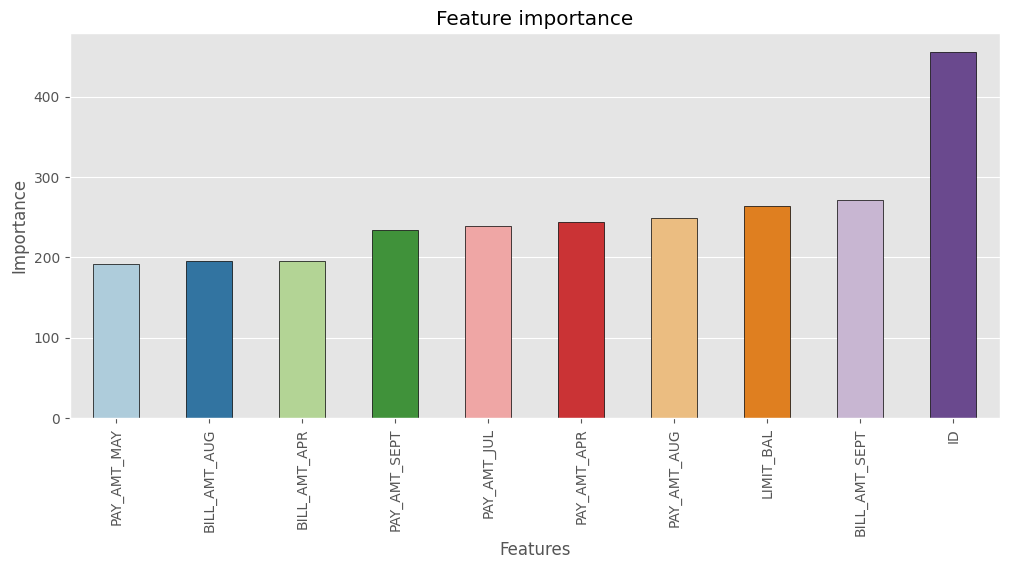

In [108]:
# Visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(12,5))
print(optimal__xg_model) 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance',width = 0.5,edgecolor = 'black', palette = 'Paired')
plt.xticks(rotation=90);
plt.title('Feature importance')
plt.show()

Most important feature in this case is PAY_SEPT_0

Comparison Chart for the models used

In [111]:
# Creating tables
Model =           ['RandomForest','LightGBM','XGBOOST']
Accuracy_Train =  ['98.25%','97.85%','95.81%']
Accuracy_Test	=   ['94.58%','94.42%','94.32%']
Precision_Train = ['98.53%','98.04%','96.16%']
Precision_Test =  ['94.37%','94.92%','94.66%']
Recall_Train =    ['97.96%','97.66%','95.43%']
Recall_Test =     ['94.81%','93.86%','93.94%']
F1_Train =        ['98.24%','97.85%','95.79%']
F1_Test =         ['94.59%','94.39%','94.30%']
ROC_AUC_Train =   ['98.25%','97.85%','95.81%']
ROC_AUC_Test =    ['94.58%','94.42%','94.32%']

# Making a dictionary of the values
table = {'Model':Model,
         'Accuracy Train':Accuracy_Train,
         'Accuracy Test':Accuracy_Test,
         'Precision Train':Precision_Train,
         'Precision Test':Precision_Test,
         'Recall Train':Recall_Train,
         'Recall Test':Recall_Test,
         'F1 Train':F1_Train,
         'F1 Test':F1_Test,
         'ROC AUC Train':ROC_AUC_Train,
         'ROC AUC Test':ROC_AUC_Test}


In [112]:
# Printing the comparison table of evaluation and performance metrics
# Creating the dataframe
pd.DataFrame(table).T

,0,1,2
Model,RandomForest,LightGBM,XGBOOST
Accuracy Train,98.25%,97.85%,95.81%
Accuracy Test,94.58%,94.42%,94.32%
Precision Train,98.53%,98.04%,96.16%
Precision Test,94.37%,94.92%,94.66%
Recall Train,97.96%,97.66%,95.43%
Recall Test,94.81%,93.86%,93.94%
F1 Train,98.24%,97.85%,95.79%
F1 Test,94.59%,94.39%,94.30%
ROC AUC Train,98.25%,97.85%,95.81%


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

From the above result we can clearly see that ***RandomForest Classifier*** has performed the best.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have chosen the ***RandomForestClassifier*** as our Final model because going through the results we can see clearly that it has performed the best.

# **Conclusion**

We have used the following steps in this Classification Project.
1. First we started with loading the dataset and going through it to understand the variables.
2. In the dataset we found that the column headers seem to be incorrect so we replaced it with the next actual column, which in turn was the real variable column.
3. Now the dataset which contained information regarding the credit card bill, payment and customer related info was not analysis ready so in the next step we performed data wrangling in it.
4. After the data wrangling we moved towards data visualization.
5. In the data visualization we used multiple graphs including Bar graph, Pie plot, Correlation heatmap, Pairplot etc. and with the help of these we found out some crucial results.
6. Next to implement our Models we needed the dataset to be more balanced and categorised.
7. Now we introduced some new features along with data preprocessing. Also at this stage we checked for outliers and missing values.
8. For outlier treatment we used IQR method.
9. After that we moved to feature manipulation and Categorical Encoding.
10. After using Onehotencoding we did data split of 30%-70% test to train and then scaled our dataset.
11. At this stage we checked whether our dataset is balanced or imbalanced and found it to be largely imbalanced.
12. For balancing the dataset we used ***SMOTE*** which balanced the dataset.
13. Now our data was ready for implementing Machine Learning models.
14. We started with Random Forest Classifier and after predicting with the model we used the Function which we created to check the evaluation metrics.
15. After the model we used RandomSearchCV for hyperparameter tuning and then checked important feature. And also used confusion matrix for evaluation purpose.
16. Our second model was ***LightBGM*** we performed the similar steps as in the case of RandomForest and found its evaluation metrics and for hyperparameter tuning here we used gridsearchcv and plotted the feature importance.
17. We again performed the same steps with ***XGBoost*** as our third model.
18. After predicting with three different models and comparing their scores we found that ***RandomForestClassifier*** is the best model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***